v1 + v2 = [4 6]
2 * v1 = [6 8]
Zero vector: [0. 0.]


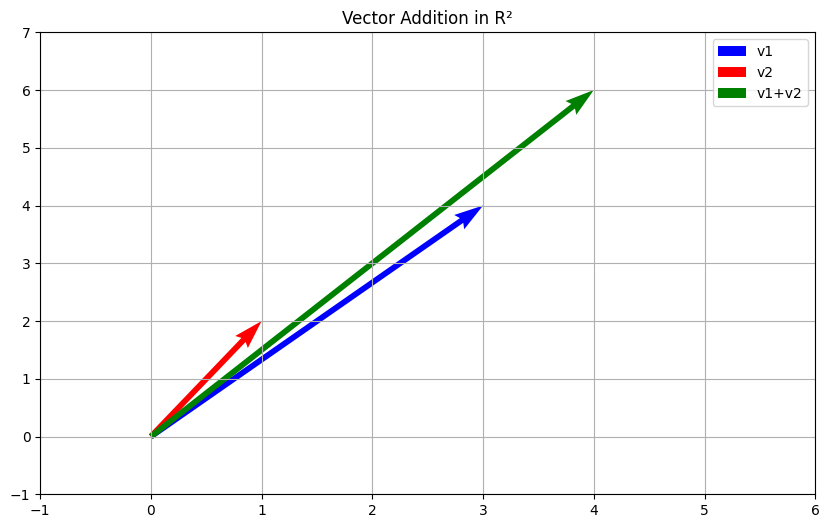

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example: R² vector space
# Vectors in 2D space
v1 = np.array([3, 4])
v2 = np.array([1, 2])
scalar = 2

# Vector addition
v_sum = v1 + v2
print(f"v1 + v2 = {v_sum}")

# Scalar multiplication
v_scaled = scalar * v1
print(f"2 * v1 = {v_scaled}")

# Zero vector
zero_vector = np.zeros(2)
print(f"Zero vector: {zero_vector}")

# Visualizing vectors
plt.figure(figsize=(10, 6))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label='v2')
plt.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, color='green', label='v1+v2')
plt.xlim(-1, 6)
plt.ylim(-1, 7)
plt.grid(True)
plt.legend()
plt.title('Vector Addition in R²')
plt.show()

In [3]:
v3=np.array([3,4])
v4=np.array([65,3])
vmult=v3*v4

In [4]:
print(vmult)

[195  12]


In [5]:
vadd=v3+v4
print(vadd)

[68  7]


In [6]:
# Dot product implementation and applications
def dot_product(a, b):
    """Calculate dot product of two vectors"""
    return np.sum(a * b)

# Example vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Built-in dot product
dot_builtin = np.dot(a, b)
print(f"Dot product: {dot_builtin}")

# Manual calculation
dot_manual = dot_product(a, b)
print(f"Manual dot product: {dot_manual}")

Dot product: 32
Manual dot product: 32


In [7]:
# Geometric interpretation
def vector_angle(a, b):
    """Calculate angle between two vectors"""
    cos_angle = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return np.arccos(cos_angle) * 180 / np.pi

angle = vector_angle(a, b)
print(f"Angle between vectors: {angle:.2f} degrees")


Angle between vectors: 12.93 degrees


In [8]:
# Application: Cosine similarity (used in recommendation systems)
def cosine_similarity(a, b):
    """Calculate cosine similarity between two vectors"""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Example: Document similarity
doc1 = np.array([3, 1, 4, 1, 5])  # Word frequencies
doc2 = np.array([2, 1, 3, 1, 4])  # Word frequencies

similarity = cosine_similarity(doc1, doc2)
print(f"Document similarity: {similarity:.3f}")

Document similarity: 0.996


In [9]:
# Cross product (3D vectors only)
def cross_product_3d(a, b):
    """Calculate cross product of two 3D vectors"""
    return np.array([
        a[1]*b[2] - a[2]*b[1],
        a[2]*b[0] - a[0]*b[2],
        a[0]*b[1] - a[1]*b[0]
    ])

a_3d = np.array([1, 2, 3])
b_3d = np.array([4, 5, 6])

cross_manual = cross_product_3d(a_3d, b_3d)
cross_builtin = np.cross(a_3d, b_3d)

print(f"Cross product (manual): {cross_manual}")
print(f"Cross product (built-in): {cross_builtin}")

# Verify perpendicularity
print(f"a · (a × b) = {np.dot(a_3d, cross_builtin)}")  # Should be 0
print(f"b · (a × b) = {np.dot(b_3d, cross_builtin)}")  # Should be 0

Cross product (manual): [-3  6 -3]
Cross product (built-in): [-3  6 -3]
a · (a × b) = 0
b · (a × b) = 0


In [10]:
# Different types of norms
def calculate_norms(vector):
    """Calculate various norms of a vector"""
    # L1 norm (Manhattan distance)
    l1_norm = np.sum(np.abs(vector))

    # L2 norm (Euclidean distance)
    l2_norm = np.sqrt(np.sum(vector**2))

    # L∞ norm (Maximum norm)
    l_inf_norm = np.max(np.abs(vector))

    # P-norm (general case)
    def p_norm(v, p):
        return np.sum(np.abs(v)**p)**(1/p)

    return {
        'L1': l1_norm,
        'L2': l2_norm,
        'L∞': l_inf_norm,
        'L3': p_norm(vector, 3)
    }


In [11]:
test_vector = np.array([3, -4, 5])
norms = calculate_norms(test_vector)

for norm_name, norm_value in norms.items():
    print(f"{norm_name} norm: {norm_value:.3f}")

# Built-in numpy norms
print(f"NumPy L1 norm: {np.linalg.norm(test_vector, 1):.3f}")
print(f"NumPy L2 norm: {np.linalg.norm(test_vector, 2):.3f}")
print(f"NumPy L∞ norm: {np.linalg.norm(test_vector, np.inf):.3f}")

L1 norm: 12.000
L2 norm: 7.071
L∞ norm: 5.000
L3 norm: 6.000
NumPy L1 norm: 12.000
NumPy L2 norm: 7.071
NumPy L∞ norm: 5.000


### Norms in ML (Summary Table)

| Norm | Name           | Common Use Cases |
|------|----------------|------------------|
| L2   | Euclidean      | KNN, Ridge, Cosine similarity |
| L1   | Manhattan      | Lasso, Feature selection |
| L∞   | Max norm       | Adversarial defense, Constraints |
| L0   | "Zero norm"\*  | Pruning, Compression |

#### Norm Formulas

- $L_2$: $||x||_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$
- $L_1$: $||x||_1 = |x_1| + |x_2| + \dots + |x_n|$
- $L_\infty$: $||x||_\infty = \max(|x_1|, |x_2|, \dots, |x_n|)$
- $L_0$: Number of non-zero elements in $x$


In [12]:
# Check linear independence
def is_linearly_independent(vectors):
    """Check if a set of vectors is linearly independent"""
    # Stack vectors as columns
    matrix = np.column_stack(vectors)

    # Calculate rank
    rank = np.linalg.matrix_rank(matrix)

    # Linearly independent if rank equals number of vectors
    return rank == len(vectors)

# Example vectors
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v3 = np.array([7, 8, 9])  # This is linearly dependent on v1 and v2

vectors = [v1, v2, v3]
print(f"Are vectors linearly independent? {is_linearly_independent(vectors)}")

# Check with independent vectors
v3_independent = np.array([1, 0, 1])
vectors_independent = [v1, v2, v3_independent]
print(f"Are modified vectors linearly independent? {is_linearly_independent(vectors_independent)}")

Are vectors linearly independent? False
Are modified vectors linearly independent? True


| Where It Shows Up            | Why It Matters                                                                                            |
| ---------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Feature Engineering**      | Remove redundant features (e.g., if feature C = A + B, it adds no new info)                               |
| **Matrix Inversion**         | Many ML algorithms (like linear regression) need **invertible matrices** — and that requires independence |
| **Dimensionality Reduction** | PCA, SVD, etc. are based on identifying independent directions in the data                                |
| **Model Stability**          | Having dependent features can cause unstable or misleading models (especially in regression)              |


In [13]:
# Matrix creation and basic operations
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix B:
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [18]:
# Matrix addition
C = A + B
print("\nA + B:")
print(C)


A + B:
[[10 10 10]
 [10 10 10]
 [10 10 10]]


In [19]:
# Matrix subtraction
D = A - B
print("\nA - B:")
print(D)


A - B:
[[-8 -6 -4]
 [-2  0  2]
 [ 4  6  8]]


In [20]:
# Element-wise multiplication (Hadamard product)
E = A * B
print("\nA * B (element-wise):")
print(E)


A * B (element-wise):
[[ 9 16 21]
 [24 25 24]
 [21 16  9]]


In [17]:
# Matrix multiplication
F = A @ B  # or np.dot(A, B)
print("\nA @ B (matrix multiplication):")
print(F)


A @ B (matrix multiplication):
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


##Matrix multiplication is fundmental to ML

Matrix A of size (m × n)

Matrix B of size (n × p)

Then the product C = A × B will be of size (m × p).

###  Matrix Multiplication Example

Let’s multiply two 2×2 matrices:

\[
A = \begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}, \quad
B = \begin{bmatrix}
5 & 6 \\
7 & 8
\end{bmatrix}
\]

---

We calculate the product \( A \times B \) as follows:

\[
A \times B = \begin{bmatrix}
(1 \times 5 + 2 \times 7) & (1 \times 6 + 2 \times 8) \\
(3 \times 5 + 4 \times 7) & (3 \times 6 + 4 \times 8)
\end{bmatrix}
= \begin{bmatrix}
19 & 22 \\
43 & 50
\end{bmatrix}
\]

---

✅ **Result:**

\[
A \times B = \begin{bmatrix}
19 & 22 \\
43 & 50
\end{bmatrix}
\]


In [21]:
# Understanding matrix multiplication
def matrix_multiply_manual(A, B):
    """Manual implementation of matrix multiplication"""
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape

    if cols_A != rows_B:
        raise ValueError("Matrix dimensions don't match for multiplication")

    result = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i, j] += A[i, k] * B[k, j]

    return result

In [22]:
# Example: Neural network forward pass
def neural_network_layer(X, W, b):
    """
    Forward pass through a neural network layer
    X: input matrix (samples x features)
    W: weight matrix (features x neurons)
    b: bias vector (neurons,)
    """
    return X @ W + b

In [23]:
# Example data
X = np.array([[1, 2, 3],     # Sample 1
              [4, 5, 6],     # Sample 2
              [7, 8, 9]])    # Sample 3

W = np.array([[0.1, 0.2],    # Weights for feature 1
              [0.3, 0.4],    # Weights for feature 2
              [0.5, 0.6]])   # Weights for feature 3

b = np.array([0.1, 0.2])     # Biases

output = neural_network_layer(X, W, b)
print("Neural network layer output:")
print(output)

Neural network layer output:
[[ 2.3  3. ]
 [ 5.   6.6]
 [ 7.7 10.2]]


In [24]:
# Important matrix properties
def matrix_properties(A):
    """Calculate various matrix properties"""
    properties = {}

    # Shape
    properties['shape'] = A.shape

    # Transpose
    properties['transpose'] = A.T

    # Trace (sum of diagonal elements)
    if A.shape[0] == A.shape[1]:  # Square matrix
        properties['trace'] = np.trace(A)

    # Determinant (for square matrices)
    if A.shape[0] == A.shape[1]:
        properties['determinant'] = np.linalg.det(A)

    # Rank
    properties['rank'] = np.linalg.matrix_rank(A)

    # Norm
    properties['frobenius_norm'] = np.linalg.norm(A, 'fro')

    return properties

# Example matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 10]])  # Made it non-singular

props = matrix_properties(A)
for prop_name, prop_value in props.items():
    print(f"{prop_name}: {prop_value}")

shape: (3, 3)
transpose: [[ 1  4  7]
 [ 2  5  8]
 [ 3  6 10]]
trace: 16
determinant: -2.9999999999999996
rank: 3
frobenius_norm: 17.435595774162696


In [25]:
# Matrix inverse and applications
def matrix_inverse_applications():
    """Demonstrate matrix inverse applications"""

    # Create an invertible matrix
    A = np.array([[2, 1, 1],
                  [1, 3, 2],
                  [1, 0, 0]])

    print("Original matrix A:")
    print(A)

    # Calculate inverse
    A_inv = np.linalg.inv(A)
    print("\nInverse of A:")
    print(A_inv)

    # Verify A * A^(-1) = I
    identity_check = A @ A_inv
    print("\nA @ A^(-1) (should be identity):")
    print(identity_check)

    # Application: Solving linear system Ax = b
    b = np.array([1, 2, 3])
    x_inv = A_inv @ b
    print(f"\nSolving Ax = b using inverse: x = {x_inv}")

    # Verify solution
    print(f"Verification A @ x = {A @ x_inv}")

    # Better approach: Use solve (more numerically stable)
    x_solve = np.linalg.solve(A, b)
    print(f"Using np.linalg.solve: x = {x_solve}")

    return A, A_inv

matrix_inverse_applications()

Original matrix A:
[[2 1 1]
 [1 3 2]
 [1 0 0]]

Inverse of A:
[[ 0.  0.  1.]
 [-2.  1.  3.]
 [ 3. -1. -5.]]

A @ A^(-1) (should be identity):
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.88178420e-16  1.00000000e+00  1.77635684e-15]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Solving Ax = b using inverse: x = [  3.   9. -14.]
Verification A @ x = [1. 2. 3.]
Using np.linalg.solve: x = [  3.   9. -14.]


(array([[2, 1, 1],
        [1, 3, 2],
        [1, 0, 0]]),
 array([[ 0.,  0.,  1.],
        [-2.,  1.,  3.],
        [ 3., -1., -5.]]))

In [26]:
# Special types of matrices important in ML
def create_special_matrices():
    """Create and demonstrate special matrices"""

    # Identity matrix
    I = np.eye(3)
    print("Identity matrix:")
    print(I)

    # Zero matrix
    Z = np.zeros((3, 3))
    print("\nZero matrix:")
    print(Z)

    # Diagonal matrix
    D = np.diag([1, 2, 3])
    print("\nDiagonal matrix:")
    print(D)

    # Symmetric matrix
    A = np.array([[1, 2, 3],
                  [2, 4, 5],
                  [3, 5, 6]])
    print("\nSymmetric matrix:")
    print(A)
    print(f"Is symmetric: {np.allclose(A, A.T)}")

    # Orthogonal matrix (columns are orthonormal)
    # Using QR decomposition to create one
    random_matrix = np.random.randn(3, 3)
    Q, R = np.linalg.qr(random_matrix)
    print("\nOrthogonal matrix:")
    print(Q)
    print(f"Q @ Q.T (should be identity):")
    print(Q @ Q.T)

    return I, Z, D, A, Q

create_special_matrices()

Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Zero matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Diagonal matrix:
[[1 0 0]
 [0 2 0]
 [0 0 3]]

Symmetric matrix:
[[1 2 3]
 [2 4 5]
 [3 5 6]]
Is symmetric: True

Orthogonal matrix:
[[-0.62053333 -0.50180938  0.60259915]
 [-0.00180252 -0.76753008 -0.64101039]
 [ 0.784178   -0.39885451  0.47537348]]
Q @ Q.T (should be identity):
[[ 1.00000000e+00 -1.68279446e-17 -1.94117799e-16]
 [-1.68279446e-17  1.00000000e+00  1.64938215e-17]
 [-1.94117799e-16  1.64938215e-17  1.00000000e+00]]


(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]]),
 array([[1, 2, 3],
        [2, 4, 5],
        [3, 5, 6]]),
 array([[-0.62053333, -0.50180938,  0.60259915],
        [-0.00180252, -0.76753008, -0.64101039],
        [ 0.784178  , -0.39885451,  0.47537348]]))

| Matrix Type | Looks Like                 | Why Important in ML                     |
| ----------- | -------------------------- | --------------------------------------- |
| Identity    | 1s on the diagonal         | Keeps things unchanged when multiplying |
| Zero        | All zeros                  | Used for resetting or initializing      |
| Diagonal    | Only diagonal has numbers  | Easy to compute with, good for scaling  |
| Symmetric   | Same as its transpose      | Used in statistics (like covariance)    |
| Orthogonal  | Columns are "nice & clean" | Used in PCA and stable algorithms       |


# Eigenvalues and Eigenvectors: A Comprehensive Introduction

## Overview

Eigenvalues and eigenvectors are fundamental concepts in linear algebra with wide-ranging applications in machine learning, data analysis, signal processing, and mathematical modeling. This notebook provides a rigorous yet accessible introduction to these essential mathematical tools.

## Mathematical Definition

For a square matrix $A \in \mathbb{R}^{n \times n}$, a non-zero vector $\mathbf{v} \in \mathbb{R}^n$ is called an **eigenvector** if there exists a scalar $\lambda$ such that:

$$A\mathbf{v} = \lambda\mathbf{v}$$

where:
- $A$ is the transformation matrix
- $\mathbf{v}$ is the eigenvector (non-zero)
- $\lambda$ is the corresponding eigenvalue

## Geometric Interpretation

The eigenvalue-eigenvector relationship reveals invariant directions under linear transformations. While most vectors change both magnitude and direction when transformed by matrix $A$, eigenvectors maintain their direction and are only scaled by their corresponding eigenvalue.

**Key insights:**
- **Eigenvector**: Defines an invariant direction
- **Eigenvalue**: Quantifies the scaling factor along that direction
- **Eigenspace**: The span of all eigenvectors corresponding to a given eigenvalue

## Characteristic Equation

To find eigenvalues, we solve the characteristic equation:

$$\det(A - \lambda I) = 0$$

where $I$ is the identity matrix. This yields the characteristic polynomial, whose roots are the eigenvalues.

## Worked Example

Consider the diagonal matrix:

$$A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$$

**Step 1: Find Eigenvalues**

The characteristic equation is:
$$\det\begin{bmatrix} 2-\lambda & 0 \\ 0 & 3-\lambda \end{bmatrix} = (2-\lambda)(3-\lambda) = 0$$

Therefore: $\lambda_1 = 2$ and $\lambda_2 = 3$

**Step 2: Find Eigenvectors**

For $\lambda_1 = 2$:
$$(A - 2I)\mathbf{v} = \mathbf{0} \Rightarrow \mathbf{v}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

For $\lambda_2 = 3$:
$$(A - 3I)\mathbf{v} = \mathbf{0} \Rightarrow \mathbf{v}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

**Verification:**
$$A\mathbf{v}_1 = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix} = 2\mathbf{v}_1$$

$$A\mathbf{v}_2 = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 3 \end{bmatrix} = 3\mathbf{v}_2$$

## Computational Implementation

```python
import numpy as np
import matplotlib.pyplot as plt

def compute_eigendecomposition(A):
    """
    Compute eigenvalues and eigenvectors of a square matrix.
    
    Parameters:
    -----------
    A : numpy.ndarray
        Square matrix for eigendecomposition
    
    Returns:
    --------
    eigenvalues : numpy.ndarray
        Array of eigenvalues
    eigenvectors : numpy.ndarray
        Matrix of eigenvectors (columns)
    """
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    return eigenvalues, eigenvectors

# Example usage
A = np.array([[2, 0],
              [0, 3]])

eigenvalues, eigenvectors = compute_eigendecomposition(A)

print("Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:")
print(eigenvectors)

# Verify the eigenvalue equation
for i in range(len(eigenvalues)):
    lhs = A @ eigenvectors[:, i]
    rhs = eigenvalues[i] * eigenvectors[:, i]
    print(f"\nVerification for λ{i+1} = {eigenvalues[i]:.3f}:")
    print(f"A·v = {lhs}")
    print(f"λ·v = {rhs}")
    print(f"Equal: {np.allclose(lhs, rhs)}")
```

## Properties and Applications

### Key Properties
1. **Multiplicative property**: If $\mathbf{v}$ is an eigenvector of $A$ with eigenvalue $\lambda$, then $c\mathbf{v}$ is also an eigenvector with the same eigenvalue for any scalar $c \neq 0$
2. **Linear independence**: Eigenvectors corresponding to distinct eigenvalues are linearly independent
3. **Trace and determinant**: $\text{tr}(A) = \sum_{i=1}^n \lambda_i$ and $\det(A) = \prod_{i=1}^n \lambda_i$

### Applications
- **Principal Component Analysis (PCA)**: Dimensionality reduction using eigenvectors of covariance matrices
- **Stability analysis**: Eigenvalues determine system stability in differential equations
- **Graph theory**: Spectral properties of adjacency matrices
- **Quantum mechanics**: Observable quantities as eigenvalues of operators
- **Image processing**: Singular Value Decomposition and compression algorithms

## Numerical Considerations

When working with eigendecomposition computationally, consider:
- **Numerical stability**: Use robust algorithms like QR decomposition
- **Symmetry**: Symmetric matrices have real eigenvalues and orthogonal eigenvectors
- **Conditioning**: Ill-conditioned matrices may have sensitive eigenvalue computations
- **Sparse matrices**: Specialized algorithms for large, sparse systems

## Further Reading

For advanced topics, explore:
- Generalized eigenvalue problems
- Singular Value Decomposition (SVD)
- Jordan canonical form
- Spectral theorems for normal matrices

| Use Case                               | Explanation                                          |
| -------------------------------------- | ---------------------------------------------------- |
| **PCA (Principal Component Analysis)** | Eigenvectors show directions of **maximum variance** |
| **Graph algorithms**                   | PageRank uses eigenvectors of the link matrix        |
| **Linear transformations**             | Help understand how matrices change space            |
| **Optimization**                       | Involve eigenvalues of Hessian and Jacobian matrices |


| Term            | Meaning                                             |
| --------------- | --------------------------------------------------- |
| **Eigenvector** | A vector that doesn’t rotate under a transformation |
| **Eigenvalue**  | The amount that eigenvector is stretched/squeezed   |
| **Matrix A**    | The transformation we’re applying                   |


In [27]:
# Eigenvalue and eigenvector computation
def eigenvalue_analysis():
    """Comprehensive eigenvalue and eigenvector analysis"""

    # Create a symmetric matrix (has real eigenvalues)
    A = np.array([[4, 2, 1],
                  [2, 3, 0],
                  [1, 0, 2]])

    print("Matrix A:")
    print(A)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    print("\nEigenvalues:")
    print(eigenvalues)

    print("\nEigenvectors:")
    print(eigenvectors)

    # Verify the eigenvalue equation: Av = λv
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        Av = A @ vec
        lv = val * vec
        print(f"\nEigenvalue {i+1}: λ = {val:.3f}")
        print(f"Av = {Av}")
        print(f"λv = {lv}")
        print(f"Av ≈ λv: {np.allclose(Av, lv)}")

    return A, eigenvalues, eigenvectors

eigenvalue_analysis()

Matrix A:
[[4 2 1]
 [2 3 0]
 [1 0 2]]

Eigenvalues:
[5.73205081 1.         2.26794919]

Eigenvectors:
[[-0.78867513 -0.57735027  0.21132487]
 [-0.57735027  0.57735027 -0.57735027]
 [-0.21132487  0.57735027  0.78867513]]

Eigenvalue 1: λ = 5.732
Av = [-4.52072594 -3.30940108 -1.21132487]
λv = [-4.52072594 -3.30940108 -1.21132487]
Av ≈ λv: True

Eigenvalue 2: λ = 1.000
Av = [-0.57735027  0.57735027  0.57735027]
λv = [-0.57735027  0.57735027  0.57735027]
Av ≈ λv: True

Eigenvalue 3: λ = 2.268
Av = [ 0.47927406 -1.30940108  1.78867513]
λv = [ 0.47927406 -1.30940108  1.78867513]
Av ≈ λv: True


(array([[4, 2, 1],
        [2, 3, 0],
        [1, 0, 2]]),
 array([5.73205081, 1.        , 2.26794919]),
 array([[-0.78867513, -0.57735027,  0.21132487],
        [-0.57735027,  0.57735027, -0.57735027],
        [-0.21132487,  0.57735027,  0.78867513]]))

# Eigendecomposition and Matrix Reconstruction

## Introduction

Eigendecomposition is a fundamental technique in linear algebra that decomposes a square matrix into its constituent eigenvalues and eigenvectors. This decomposition provides deep insights into the matrix's structure and enables efficient computations for various applications.

## Mathematical Foundation

### General Eigendecomposition

For a square matrix A, eigendecomposition expresses the matrix as:

$$A = Q\Lambda Q^{-1}$$

where:
- **Q**: Matrix whose columns are the eigenvectors of A
- **Λ**: Diagonal matrix containing the eigenvalues of A
- **Q⁻¹**: Inverse of the eigenvector matrix

### Symmetric Matrix Special Case

For symmetric matrices (A = Aᵀ), the eigendecomposition simplifies to:

$$A = Q\Lambda Q^T$$

This is particularly useful because:
- Eigenvectors are orthogonal
- All eigenvalues are real
- Q⁻¹ = Qᵀ (orthogonal matrix property)

## Implementation and Analysis

```python
import numpy as np
import matplotlib.pyplot as plt

def perform_eigendecomposition(A, verbose=True):
    """
    Perform eigendecomposition and reconstruct the original matrix.
    
    Parameters:
    -----------
    A : numpy.ndarray
        Square matrix to decompose
    verbose : bool
        Whether to print detailed information
    
    Returns:
    --------
    eigenvalues : numpy.ndarray
        Eigenvalues of the matrix
    eigenvectors : numpy.ndarray
        Eigenvectors of the matrix
    reconstruction_error : float
        Error in matrix reconstruction
    """
    
    # Check if matrix is square
    if A.shape[0] != A.shape[1]:
        raise ValueError("Matrix must be square for eigendecomposition")
    
    # Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Create diagonal matrix of eigenvalues
    Lambda = np.diag(eigenvalues)
    Q = eigenvectors
    
    # Reconstruct matrix using eigendecomposition
    A_reconstructed = Q @ Lambda @ np.linalg.inv(Q)
    
    # Calculate reconstruction error
    reconstruction_error = np.linalg.norm(A - A_reconstructed)
    
    if verbose:
        print("Original Matrix A:")
        print(A)
        print(f"\nEigenvalues: {eigenvalues}")
        print(f"\nEigenvectors (Q):")
        print(Q)
        print(f"\nDiagonal Matrix (Λ):")
        print(Lambda)
        print(f"\nReconstructed Matrix:")
        print(A_reconstructed)
        print(f"\nReconstruction Error: {reconstruction_error:.2e}")
    
    # Special handling for symmetric matrices
    if np.allclose(A, A.T):
        A_reconstructed_symmetric = Q @ Lambda @ Q.T
        symmetric_error = np.linalg.norm(A - A_reconstructed_symmetric)
        
        if verbose:
            print(f"\nMatrix is symmetric!")
            print(f"Symmetric reconstruction error: {symmetric_error:.2e}")
            print("Using Q^T instead of Q^(-1) for better numerical stability")
    
    return eigenvalues, eigenvectors, reconstruction_error

# Example 1: Symmetric Matrix
print("="*60)
print("EXAMPLE 1: SYMMETRIC MATRIX")
print("="*60)

A_symmetric = np.array([[3, 1, 1],
                       [1, 3, 1],
                       [1, 1, 3]])

eigenvals_sym, eigenvecs_sym, error_sym = perform_eigendecomposition(A_symmetric)

# Example 2: Non-symmetric Matrix
print("\n" + "="*60)
print("EXAMPLE 2: NON-SYMMETRIC MATRIX")
print("="*60)

A_nonsymmetric = np.array([[2, 1, 0],
                          [0, 2, 1],
                          [1, 0, 2]])

eigenvals_nonsym, eigenvecs_nonsym, error_nonsym = perform_eigendecomposition(A_nonsymmetric)

# Verification function
def verify_eigendecomposition(A, eigenvalues, eigenvectors):
    """
    Verify that the eigendecomposition is correct by checking Av = λv
    """
    print("\nVerification of Eigendecomposition:")
    print("-" * 40)
    
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        lhs = A @ eigenvec
        rhs = eigenval * eigenvec
        error = np.linalg.norm(lhs - rhs)
        
        print(f"Eigenvalue {i+1}: λ = {eigenval:.3f}")
        print(f"  ||Av - λv|| = {error:.2e}")
        print(f"  Verification: {'✓' if error < 1e-10 else '✗'}")

# Verify both examples
verify_eigendecomposition(A_symmetric, eigenvals_sym, eigenvecs_sym)
verify_eigendecomposition(A_nonsymmetric, eigenvals_nonsym, eigenvecs_nonsym)
```

## Properties and Insights

### Diagonalization Conditions

A matrix A can be diagonalized if and only if:
1. A has n linearly independent eigenvectors (for n×n matrix)
2. The geometric multiplicity equals algebraic multiplicity for each eigenvalue

### Computational Considerations

**Numerical Stability:**
- For symmetric matrices, use the symmetric property (Q⁻¹ = Qᵀ)
- Avoid explicit computation of matrix inverse when possible
- Use specialized algorithms for symmetric matrices

**Condition Number:**
- Well-conditioned matrices have stable eigendecomposition
- Ill-conditioned matrices may have sensitive eigenvalue computations

## Applications

### 1. Principal Component Analysis (PCA)
```python
def demonstrate_pca_connection():
    """
    Show how eigendecomposition relates to PCA
    """
    # Generate sample data
    np.random.seed(42)
    data = np.random.randn(100, 3)
    data[:, 1] = data[:, 0] + 0.5 * np.random.randn(100)  # Correlation
    
    # Compute covariance matrix
    cov_matrix = np.cov(data.T)
    
    # Eigendecomposition of covariance matrix
    eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
    
    # Sort by eigenvalue (descending)
    idx = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    print("PCA via Eigendecomposition:")
    print(f"Principal components (explained variance): {eigenvals}")
    print(f"Proportion of variance explained: {eigenvals / eigenvals.sum()}")
    
    return eigenvals, eigenvecs

pca_eigenvals, pca_eigenvecs = demonstrate_pca_connection()
```

### 2. Matrix Powers and Exponentials
```python
def matrix_power_via_eigendecomposition(A, power):
    """
    Compute matrix power A^n using eigendecomposition
    """
    eigenvals, eigenvecs = np.linalg.eig(A)
    
    # A^n = Q * Λ^n * Q^(-1)
    Lambda_power = np.diag(eigenvals ** power)
    A_power = eigenvecs @ Lambda_power @ np.linalg.inv(eigenvecs)
    
    return A_power

# Example: Compute A^5
A_power_5 = matrix_power_via_eigendecomposition(A_symmetric, 5)
print("\nA^5 via eigendecomposition:")
print(A_power_5)

# Verify with direct computation
A_power_5_direct = np.linalg.matrix_power(A_symmetric, 5)
print(f"\nError compared to direct computation: {np.linalg.norm(A_power_5 - A_power_5_direct):.2e}")
```

## Practical Considerations

### When to Use Eigendecomposition

**Advantages:**
- Provides complete spectral information
- Enables efficient computation of matrix functions
- Reveals fundamental matrix properties

**Limitations:**
- Only applicable to square matrices
- May not exist for all matrices
- Computationally expensive for large matrices

### Alternative Decompositions

For matrices where eigendecomposition is not suitable:
- **Singular Value Decomposition (SVD)**: Works for any matrix
- **QR Decomposition**: Useful for solving linear systems
- **Cholesky Decomposition**: Efficient for positive definite matrices

## Summary

Eigendecomposition is a powerful tool that reveals the fundamental structure of square matrices. By decomposing a matrix into its eigenvalues and eigenvectors, we gain insights into the matrix's behavior and enable efficient computations for various applications in data science, engineering, and mathematics.

In [28]:
# Eigendecomposition and reconstruction
def eigendecomposition_demo():
    """Demonstrate eigendecomposition and matrix reconstruction"""

    # Symmetric matrix for clear demonstration
    A = np.array([[3, 1, 1],
                  [1, 3, 1],
                  [1, 1, 3]])

    print("Original matrix A:")
    print(A)

    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Create diagonal matrix of eigenvalues
    Lambda = np.diag(eigenvalues)
    Q = eigenvectors

    print("\nEigenvalue matrix Λ:")
    print(Lambda)

    print("\nEigenvector matrix Q:")
    print(Q)

    # Reconstruct original matrix: A = Q Λ Q^(-1)
    A_reconstructed = Q @ Lambda @ np.linalg.inv(Q)

    print("\nReconstructed matrix A:")
    print(A_reconstructed)

    print(f"\nReconstruction error: {np.linalg.norm(A - A_reconstructed)}")

    # For symmetric matrices, Q is orthogonal, so Q^(-1) = Q^T
    if np.allclose(A, A.T):
        A_reconstructed_symmetric = Q @ Lambda @ Q.T
        print(f"Symmetric reconstruction error: {np.linalg.norm(A - A_reconstructed_symmetric)}")

    return A, eigenvalues, eigenvectors

eigendecomposition_demo()

Original matrix A:
[[3 1 1]
 [1 3 1]
 [1 1 3]]

Eigenvalue matrix Λ:
[[2. 0. 0.]
 [0. 5. 0.]
 [0. 0. 2.]]

Eigenvector matrix Q:
[[-0.81649658  0.57735027 -0.29329423]
 [ 0.40824829  0.57735027 -0.5132649 ]
 [ 0.40824829  0.57735027  0.80655913]]

Reconstructed matrix A:
[[3. 1. 1.]
 [1. 3. 1.]
 [1. 1. 3.]]

Reconstruction error: 3.3583099550713978e-15
Symmetric reconstruction error: 1.0160010160015247


(array([[3, 1, 1],
        [1, 3, 1],
        [1, 1, 3]]),
 array([2., 5., 2.]),
 array([[-0.81649658,  0.57735027, -0.29329423],
        [ 0.40824829,  0.57735027, -0.5132649 ],
        [ 0.40824829,  0.57735027,  0.80655913]]))

#Application: Principal Component Analysis (PCA)

Original data shape: (100, 4)
PCA data shape: (100, 2)
Explained variance ratio: [0.44143184 0.28193667]
Cumulative explained variance: [0.44143184 0.72336852]


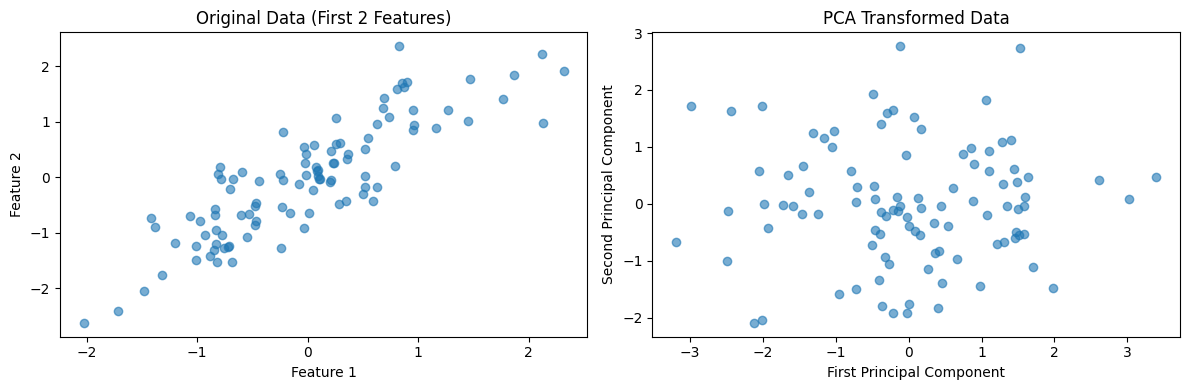

In [29]:
# PCA implementation using eigendecomposition
def pca_from_scratch(X, n_components=2):
    """
    Implement PCA using eigendecomposition
    X: data matrix (samples x features)
    n_components: number of principal components
    """

    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Compute covariance matrix
    cov_matrix = np.cov(X_centered.T)

    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort by eigenvalues (descending)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select top n_components
    principal_components = eigenvectors[:, :n_components]

    # Transform data
    X_pca = X_centered @ principal_components

    # Explained variance ratio
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    return X_pca, principal_components, explained_variance_ratio

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 4)  # 100 samples, 4 features
X[:, 1] = X[:, 0] + 0.5 * np.random.randn(100)  # Create some correlation

# Apply PCA
X_pca, components, var_ratio = pca_from_scratch(X, n_components=2)

print("Original data shape:", X.shape)
print("PCA data shape:", X_pca.shape)
print("Explained variance ratio:", var_ratio[:2])
print("Cumulative explained variance:", np.cumsum(var_ratio[:2]))

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.title('Original Data (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title('PCA Transformed Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()

#Matrix Decompostion

### 🔍 Singular Value Decomposition (SVD)

SVD breaks any matrix \( A \) into:

\[
A = U \Sigma V^T
\]

- \( U \): Left singular vectors (orthogonal)
- \( \Sigma \): Diagonal matrix of singular values
- \( V^T \): Right singular vectors (orthogonal transpose)

---

#### 🧪 Python Implementation

```python
import numpy as np

# Sample matrix (non-square)
A = np.array([
    [3, 1, 1],
    [1, 3, 1],
    [1, 1, 3],
    [0, 0, 1]
])

print("Original matrix A:")
print(A)

# Perform SVD
U, s, Vt = np.linalg.svd(A)

# Convert singular values into diagonal matrix Σ
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:len(s), :len(s)] = np.diag(s)

# Reconstruct A
A_reconstructed = U @ Sigma @ Vt

# Reconstruction error
print("Reconstruction error:", np.linalg.norm(A - A_reconstructed))

# Low-rank approximation (k=2)
def low_rank_approximation(U, s, Vt, k):
    return U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

A_rank2 = low_rank_approximation(U, s, Vt, 2)
print("Rank-2 approximation error:", np.linalg.norm(A - A_rank2))


In [30]:
# SVD implementation and applications
def svd_analysis():
    """Demonstrate SVD and its applications"""

    # Create a sample matrix
    A = np.array([[3, 1, 1],
                  [1, 3, 1],
                  [1, 1, 3],
                  [0, 0, 1]])

    print("Original matrix A:")
    print(A)
    print(f"Shape: {A.shape}")

    # Compute SVD
    U, s, Vt = np.linalg.svd(A)

    print(f"\nU shape: {U.shape}")
    print(f"s shape: {s.shape}")
    print(f"Vt shape: {Vt.shape}")

    # Reconstruct matrix
    # Need to pad s with zeros for non-square matrices
    Sigma = np.zeros((A.shape[0], A.shape[1]))
    Sigma[:min(A.shape), :min(A.shape)] = np.diag(s)

    A_reconstructed = U @ Sigma @ Vt

    print("\nReconstructed matrix:")
    print(A_reconstructed)
    print(f"Reconstruction error: {np.linalg.norm(A - A_reconstructed)}")

    # Low-rank approximation
    def low_rank_approximation(U, s, Vt, k):
        """Create rank-k approximation"""
        return U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

    # Rank-2 approximation
    A_rank2 = low_rank_approximation(U, s, Vt, 2)
    print(f"\nRank-2 approximation error: {np.linalg.norm(A - A_rank2)}")

    return U, s, Vt

svd_analysis()

Original matrix A:
[[3 1 1]
 [1 3 1]
 [1 1 3]
 [0 0 1]]
Shape: (4, 3)

U shape: (4, 4)
s shape: (3,)
Vt shape: (3, 3)

Reconstructed matrix:
[[ 3.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  3.00000000e+00]
 [ 4.06312445e-16 -2.20441720e-16  1.00000000e+00]]
Reconstruction error: 3.1251074987285306e-15

Rank-2 approximation error: 2.0


(array([[-5.69572173e-01, -4.08794525e-01,  7.07106781e-01,
          9.20574618e-02],
        [-5.69572173e-01, -4.08794525e-01, -7.07106781e-01,
          9.20574618e-02],
        [-5.80661930e-01,  7.26111908e-01,  1.58206781e-15,
         -3.68229847e-01],
        [-1.18350338e-01,  3.72203668e-01,  8.60422844e-16,
          9.20574618e-01]]),
 array([5.03429046, 2.157758  , 2.        ]),
 array([[-5.67895445e-01, -5.67895445e-01, -5.95809975e-01],
        [-4.21301274e-01, -4.21301274e-01,  8.03125441e-01],
        [ 7.07106781e-01, -7.07106781e-01,  1.44328993e-15]]))

### 📐 QR Decomposition and Least Squares

---

#### 📌 What is QR Decomposition?

It breaks matrix \( A \) into:

\[
A = QR
\]

- \( Q \): orthogonal matrix (columns are orthonormal)
- \( R \): upper triangular matrix

---

#### ✅ Applications

- Least squares regression
- Solving overdetermined systems
- Numerically stable matrix computations

---

#### 🧪 Python Example

```python
import numpy as np

# Define a 4x3 matrix
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 10],
    [11, 12, 13]
], dtype=float)

# QR decomposition
Q, R = np.linalg.qr(A)

# Reconstruct A
A_reconstructed = Q @ R
print("Reconstruction error:", np.linalg.norm(A - A_reconstructed))

# Orthogonality check
print("Q.T @ Q:")
print(Q.T @ Q)

# Solve Ax = b using QR
b = np.array([1, 2, 3, 4])
x_qr = np.linalg.solve(R, Q.T @ b)
print("Solution using QR:", x_qr)

# Compare with NumPy least squares
x_lstsq = np.linalg.lstsq(A, b, rcond=None)[0]
print("NumPy lstsq solution:", x_lstsq)


In [32]:
# QR decomposition and applications
def qr_decomposition_demo():
    """Demonstrate QR decomposition and its applications"""

    # Create a matrix
    A = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 10],
                  [11, 12, 13]], dtype=float)

    print("Original matrix A:")
    print(A)

    # QR decomposition
    Q, R = np.linalg.qr(A)

    print("\nQ matrix (orthogonal):")
    print(Q)

    print("\nR matrix (upper triangular):")
    print(R)

    # Verify orthogonality of Q
    print(f"\nQ.T @ Q (should be identity):")
    print(Q.T @ Q)

    # Verify reconstruction
    A_reconstructed = Q @ R
    print(f"\nReconstruction error: {np.linalg.norm(A - A_reconstructed)}")

    # Application: Solving least squares problems
    # For overdetermined system Ax = b, solution is x = R^(-1) @ Q.T @ b
    b = np.array([1, 2, 3, 4])

    # Solve using QR
    x_qr = np.linalg.solve(R, Q.T @ b)
    print(f"\nLeast squares solution using QR: {x_qr}")

    # Compare with numpy's least squares
    x_lstsq = np.linalg.lstsq(A, b, rcond=None)[0]
    print(f"NumPy least squares solution: {x_lstsq}")

    return Q, R

qr_decomposition_demo()

Original matrix A:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. 10.]
 [11. 12. 13.]]

Q matrix (orthogonal):
[[-0.07312724 -0.8104029   0.16665222]
 [-0.29250897 -0.46944071  0.24729039]
 [-0.5118907  -0.12847851 -0.84938871]
 [-0.80439967  0.32613775  0.43544611]]

R matrix (upper triangular):
[[-13.67479433 -15.35672091 -17.55053818]
 [  0.          -1.08218436  -2.29284723]
 [  0.           0.          -0.84938871]]

Q.T @ Q (should be identity):
[[ 1.00000000e+00  3.88975389e-16 -5.25861825e-17]
 [ 3.88975389e-16  1.00000000e+00  1.08627076e-17]
 [-5.25861825e-17  1.08627076e-17  1.00000000e+00]]

Reconstruction error: 1.6013403698258692e-14

Least squares solution using QR: [-0.27848101  0.40506329  0.17088608]
NumPy least squares solution: [-0.27848101  0.40506329  0.17088608]


(array([[-0.07312724, -0.8104029 ,  0.16665222],
        [-0.29250897, -0.46944071,  0.24729039],
        [-0.5118907 , -0.12847851, -0.84938871],
        [-0.80439967,  0.32613775,  0.43544611]]),
 array([[-13.67479433, -15.35672091, -17.55053818],
        [  0.        ,  -1.08218436,  -2.29284723],
        [  0.        ,   0.        ,  -0.84938871]]))

### 🧮 Cholesky Decomposition (For Positive Definite Matrices)

---

#### 📌 Formula

\[
A = LL^T
\]

- \( A \): symmetric, positive definite matrix
- \( L \): lower triangular matrix
- \( L^T \): transpose of \( L \)

---

#### ✅ Conditions for Cholesky

- Matrix must be **symmetric**: \( A = A^T \)  
- All **eigenvalues > 0** (positive definite)

---

#### 🧪 Python Example

```python
import numpy as np

# Define a symmetric, positive definite matrix
A = np.array([[4, 2, 1],
              [2, 3, 0.5],
              [1, 0.5, 2]])

# Check if positive definite
eigenvalues = np.linalg.eigvals(A)
print("Eigenvalues:", eigenvalues)
print("Is positive definite:", np.all(eigenvalues > 0))

# Cholesky decomposition
L = np.linalg.cholesky(A)

# Verify reconstruction: A = L @ L.T
A_reconstructed = L @ L.T
print("Reconstruction error:", np.linalg.norm(A - A_reconstructed))


In [33]:
# Cholesky decomposition
def cholesky_decomposition_demo():
    """Demonstrate Cholesky decomposition"""

    # Create a positive definite matrix
    A = np.array([[4, 2, 1],
                  [2, 3, 0.5],
                  [1, 0.5, 2]])

    print("Original matrix A (positive definite):")
    print(A)

    # Check if positive definite
    eigenvalues = np.linalg.eigvals(A)
    print(f"\nEigenvalues: {eigenvalues}")
    print(f"Is positive definite: {np.all(eigenvalues > 0)}")

    # Cholesky decomposition
    L = np.linalg.cholesky(A)

    print("\nCholesky factor L:")
    print(L)

    # Verify A = L @ L.T
    A_reconstructed = L @ L.T
    print(f"\nReconstruction error: {np.linalg.norm(A - A_reconstructed)}")

    # Application: Generating correlated random variables
    # If X ~ N(0, I), then L @ X ~ N(0, A)
    np.random.seed(42)
    n_samples = 1000
    X = np.random.randn(3, n_samples)

    # Transform to have covariance A
    Y = L @ X

    # Check empirical covariance
    empirical_cov = np.cov(Y)
    print(f"\nEmpirical covariance (should be close to A):")
    print(empirical_cov)

    return L

cholesky_decomposition_demo()

Original matrix A (positive definite):
[[4.  2.  1. ]
 [2.  3.  0.5]
 [1.  0.5 2. ]]

Eigenvalues: [5.87257519 1.31625773 1.81116708]
Is positive definite: True

Cholesky factor L:
[[2.         0.         0.        ]
 [1.         1.41421356 0.        ]
 [0.5        0.         1.32287566]]

Reconstruction error: 4.440892098500626e-16

Empirical covariance (should be close to A):
[[3.83545541 1.80611941 1.01524589]
 [1.80611941 2.83708602 0.45916787]
 [1.01524589 0.45916787 1.96047605]]


array([[2.        , 0.        , 0.        ],
       [1.        , 1.41421356, 0.        ],
       [0.5       , 0.        , 1.32287566]])

| **Decomposition** | **Form**               | **Matrix Type**               | **Used In ML For**                                                            | **Notes**                                                     |
| ----------------- | ---------------------- | ----------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------------------- |
| **LU**            | $A = LU$               | Square matrices               | Fast solution of linear systems                                               | Rare in ML directly, but used in low-level solvers            |
| **QR**            | $A = QR$               | Square or rectangular         | Linear regression (least squares), Gram-Schmidt orthogonalization             | Numerically stable way to solve $Ax = b$                      |
| **Cholesky**      | $A = LL^T$             | Symmetric + Positive Definite | Gaussian processes, sampling correlated variables, Bayesian ML                | Much faster than LU/SVD, but works only on SPD matrices       |
| **Eigendecomp.**  | $A = Q \Lambda Q^{-1}$ | Square (often symmetric)      | PCA (with covariance matrix), spectral clustering, graph analysis             | Eigenvectors = directions of variance; Eigenvalues = strength |
| **SVD**           | $A = U \Sigma V^T$     | Any matrix                    | PCA, LSA (in NLP), recommendation systems, noise reduction, image compression | Most general and powerful; handles any matrix                 |


### 🔁 Derivatives and Gradients in ML – Simple Example

---

#### 📌 Problem: Linear Regression

We want to learn a line:

\[
\hat{y} = wx + b
\]

We measure how bad our prediction is using the loss function:

\[
L(w, b) = \frac{1}{2}(wx + b - y)^2
\]

---

#### 📐 Why Derivatives?

To minimize the loss, we compute:

\[
\frac{\partial L}{\partial w} = (wx + b - y) \cdot x
\]
\[
\frac{\partial L}{\partial b} = (wx + b - y)
\]

These tell us **how the loss changes** with each parameter.

---

#### ⚙️ Gradient Descent Updates

We update the parameters step by step:

\[
w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}
\]
\[
b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b}
\]

Where:
- \( \eta \): learning rate (small positive number)

---

#### 📈 Example (Single Point)

```python
# Example: one training point (x=2, y=5)
x = 2
y = 5

# Initial weights
w = 0.0
b = 0.0
learning_rate = 0.1

# Compute prediction
y_pred = w * x + b

# Compute gradients
dw = (y_pred - y) * x
db = (y_pred - y)

# Update weights
w = w - learning_rate * dw
b = b - learning_rate * db

print(f"Updated w: {w}, Updated b: {b}")


In [34]:
# Numerical differentiation and gradient computation
def numerical_derivative(f, x, h=1e-7):
    """Compute numerical derivative using finite differences"""
    return (f(x + h) - f(x - h)) / (2 * h)

def numerical_gradient(f, x, h=1e-7):
    """Compute numerical gradient for multivariate functions"""
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += h
        x_minus[i] -= h
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * h)
    return grad

# Example functions
def f_univariate(x):
    """Simple univariate function: f(x) = x^2 + 2x + 1"""
    return x**2 + 2*x + 1

def f_multivariate(x):
    """Multivariate function: f(x) = x1^2 + x2^2 + x1*x2"""
    return x[0]**2 + x[1]**2 + x[0]*x[1]

# Compute derivatives
x_point = 2.0
derivative = numerical_derivative(f_univariate, x_point)
print(f"Derivative of f(x) at x={x_point}: {derivative}")
print(f"Analytical derivative: {2*x_point + 2}")

# Compute gradients
x_point = np.array([1.0, 2.0])
gradient = numerical_gradient(f_multivariate, x_point)
print(f"\nGradient of f(x) at x={x_point}: {gradient}")
print(f"Analytical gradient: [{2*x_point[0] + x_point[1]}, {2*x_point[1] + x_point[0]}]")

Derivative of f(x) at x=2.0: 5.999999990180527
Analytical derivative: 6.0

Gradient of f(x) at x=[1. 2.]: [4. 5.]
Analytical gradient: [4.0, 5.0]


# 🔗 Chain Rule in Machine Learning

## 📌 What is the Chain Rule?

The **chain rule** is a fundamental rule in calculus used to compute the derivative of **composite functions**. It's the mathematical foundation that makes training neural networks possible.

**Mathematical Definition:**
If we have a composite function where:
$$y = f(g(x))$$

Then:
$$\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}$$

**In Machine Learning Context:**
- Each layer in a neural network applies a function to the previous layer
- To train the model, we need to compute how the loss changes with respect to weights
- The chain rule enables **backpropagation** — the algorithm that trains neural networks

## 🧠 Simple Mathematical Example

Let's work through a concrete example:
$$y = (x^2 + 1)^3$$

### Step-by-Step Breakdown:
1. $u = x^2$
2. $v = u + 1 = x^2 + 1$  
3. $y = v^3 = (x^2 + 1)^3$

### Apply Chain Rule:
$$\frac{dy}{dx} = \frac{dy}{dv} \cdot \frac{dv}{du} \cdot \frac{du}{dx}$$

### Calculate Each Derivative:
- $\frac{dy}{dv} = 3v^2 = 3(x^2 + 1)^2$
- $\frac{dv}{du} = 1$
- $\frac{du}{dx} = 2x$

### Final Result:
$$\frac{dy}{dx} = 3(x^2 + 1)^2 \cdot 1 \cdot 2x = 6x(x^2 + 1)^2$$

## 🧪 Python Implementation: Manual Backpropagation

```python
import numpy as np
import matplotlib.pyplot as plt

class ComputationGraph:
    """Demonstrate the chain rule manually"""
    
    def __init__(self):
        self.values = {}
        self.gradients = {}
    
    def forward(self, x):
        """Forward pass: compute y = (x² + 1)³"""
        u = x**2
        v = u + 1
        y = v**3
        
        # Store intermediate values
        self.values['x'] = x
        self.values['u'] = u
        self.values['v'] = v
        self.values['y'] = y
        
        return y
    
    def backward(self):
        """Backward pass: compute gradients using chain rule"""
        x = self.values['x']
        u = self.values['u']
        v = self.values['v']
        
        # Start with dy/dy = 1
        self.gradients['y'] = 1.0
        
        # dy/dv = dy/dy * d(v³)/dv = 1 * 3v²
        self.gradients['v'] = self.gradients['y'] * 3 * v**2
        
        # dy/du = dy/dv * d(u+1)/du = dy/dv * 1
        self.gradients['u'] = self.gradients['v'] * 1
        
        # dy/dx = dy/du * d(x²)/dx = dy/du * 2x
        self.gradients['x'] = self.gradients['u'] * 2 * x
        
        return self.gradients['x']
    
    def analytical_gradient(self, x):
        """Analytical solution for verification"""
        return 6 * x * (x**2 + 1)**2

# Test the implementation
graph = ComputationGraph()
x_test = 2.0

# Forward pass
y = graph.forward(x_test)

# Backward pass
grad_numerical = graph.backward()

# Analytical gradient
grad_analytical = graph.analytical_gradient(x_test)

print(f"Input x: {x_test}")
print(f"Output y = (x² + 1)³: {y}")
print(f"Gradient (numerical): {grad_numerical}")
print(f"Gradient (analytical): {grad_analytical}")
print(f"Error: {abs(grad_numerical - grad_analytical)}")

# Visualize the function and its derivative
x_range = np.linspace(-3, 3, 100)
y_values = [(x**2 + 1)**3 for x in x_range]
grad_values = [6 * x * (x**2 + 1)**2 for x in x_range]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_range, y_values, 'b-', label='y = (x² + 1)³')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, grad_values, 'r-', label="dy/dx = 6x(x² + 1)²")
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.title('Derivative')
plt.legend()

plt.tight_layout()
plt.show()
```

## 🤖 Neural Network Example

Let's see how the chain rule applies to a simple neural network:

```python
class SimpleNeuralNetwork:
    """A simple 2-layer neural network demonstrating chain rule"""
    
    def __init__(self):
        # Initialize weights randomly
        np.random.seed(42)
        self.W1 = np.random.randn(2, 3) * 0.1  # Input to hidden
        self.b1 = np.zeros((1, 3))             # Hidden bias
        self.W2 = np.random.randn(3, 1) * 0.1  # Hidden to output
        self.b2 = np.zeros((1, 1))             # Output bias
        
        # Store intermediate values for backprop
        self.cache = {}
    
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        """Forward pass"""
        # Layer 1: z1 = X * W1 + b1
        z1 = np.dot(X, self.W1) + self.b1
        
        # Activation: a1 = sigmoid(z1)
        a1 = self.sigmoid(z1)
        
        # Layer 2: z2 = a1 * W2 + b2
        z2 = np.dot(a1, self.W2) + self.b2
        
        # Output: a2 = sigmoid(z2)
        a2 = self.sigmoid(z2)
        
        # Cache for backprop
        self.cache = {
            'X': X, 'z1': z1, 'a1': a1,
            'z2': z2, 'a2': a2
        }
        
        return a2
    
    def backward(self, X, y, output):
        """Backward pass using chain rule"""
        m = X.shape[0]  # Number of samples
        
        # Get cached values
        z1, a1, z2, a2 = self.cache['z1'], self.cache['a1'], self.cache['z2'], self.cache['a2']
        
        # Output layer gradients
        # dL/da2 = 2(a2 - y)  [assuming MSE loss]
        dL_da2 = 2 * (a2 - y) / m
        
        # dL/dz2 = dL/da2 * da2/dz2 = dL/da2 * sigmoid'(z2)
        dL_dz2 = dL_da2 * self.sigmoid_derivative(z2)
        
        # dL/dW2 = dL/dz2 * dz2/dW2 = dL/dz2 * a1
        dL_dW2 = np.dot(a1.T, dL_dz2)
        
        # dL/db2 = dL/dz2 * dz2/db2 = dL/dz2 * 1
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        # dL/da1 = dL/dz2 * dz2/da1 = dL/dz2 * W2
        dL_da1 = np.dot(dL_dz2, self.W2.T)
        
        # dL/dz1 = dL/da1 * da1/dz1 = dL/da1 * sigmoid'(z1)
        dL_dz1 = dL_da1 * self.sigmoid_derivative(z1)
        
        # dL/dW1 = dL/dz1 * dz1/dW1 = dL/dz1 * X
        dL_dW1 = np.dot(X.T, dL_dz1)
        
        # dL/db1 = dL/dz1 * dz1/db1 = dL/dz1 * 1
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
        
        return {
            'dW1': dL_dW1, 'db1': dL_db1,
            'dW2': dL_dW2, 'db2': dL_db2
        }
    
    def train_step(self, X, y, learning_rate=0.01):
        """Single training step"""
        # Forward pass
        output = self.forward(X)
        
        # Compute loss (MSE)
        loss = np.mean((output - y)**2)
        
        # Backward pass
        grads = self.backward(X, y, output)
        
        # Update weights
        self.W1 -= learning_rate * grads['dW1']
        self.b1 -= learning_rate * grads['db1']
        self.W2 -= learning_rate * grads['dW2']
        self.b2 -= learning_rate * grads['db2']
        
        return loss

# Example usage
# Create some dummy data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).reshape(-1, 1).astype(float)

# Create and train network
nn = SimpleNeuralNetwork()

print("Training Neural Network...")
for epoch in range(1000):
    loss = nn.train_step(X, y)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test the network
test_X = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1]])
predictions = nn.forward(test_X)

print("\nTest Results:")
for i, (x, pred) in enumerate(zip(test_X, predictions)):
    print(f"Input: {x}, Prediction: {pred[0]:.4f}")
```

## 🔍 Chain Rule in Different ML Contexts

### 1. **Convolutional Neural Networks (CNNs)**
```python
# Conceptual example - simplified convolution backprop
def conv_backward(dout, cache):
    """
    Backward pass for convolution
    dout: gradient of loss w.r.t. output
    cache: stored values from forward pass
    """
    x, w, b, conv_param = cache
    
    # Chain rule applied to convolution operation
    dx = conv_backward_naive(dout, w, conv_param)  # dL/dx = dL/dout * dout/dx
    dw = conv_backward_w(dout, x, conv_param)      # dL/dw = dL/dout * dout/dw
    db = conv_backward_b(dout)                     # dL/db = dL/dout * dout/db
    
    return dx, dw, db
```

### 2. **Recurrent Neural Networks (RNNs)**
```python
# Backpropagation through time (BPTT)
def rnn_backward(dh, cache):
    """
    Backward pass for RNN
    Demonstrates chain rule through time steps
    """
    x, h_prev, Wx, Wh, b = cache
    
    # Chain rule: dL/dh_prev = dL/dh * dh/dh_prev
    dh_prev = np.dot(dh, Wh.T)
    
    # Chain rule: dL/dWx = dL/dh * dh/dWx
    dWx = np.dot(x.T, dh)
    
    # Chain rule: dL/dWh = dL/dh * dh/dWh  
    dWh = np.dot(h_prev.T, dh)
    
    return dh_prev, dWx, dWh
```

### 3. **Attention Mechanisms**
```python
# Simplified attention backward pass
def attention_backward(dout, cache):
    """
    Chain rule in attention mechanism
    """
    Q, K, V, scores, attention_weights = cache
    
    # Chain rule through softmax and matrix multiplications
    dV = np.dot(attention_weights.T, dout)
    d_attention = np.dot(dout, V.T)
    
    # Softmax backward (chain rule)
    d_scores = softmax_backward(d_attention, attention_weights)
    
    # Matrix multiplication backward (chain rule)
    dQ = np.dot(d_scores, K)
    dK = np.dot(d_scores.T, Q)
    
    return dQ, dK, dV
```

## 🎯 Key Applications in Modern ML

### 1. **Automatic Differentiation**
Modern frameworks like PyTorch and TensorFlow use automatic differentiation:

```python
import torch

# PyTorch automatically applies chain rule
x = torch.tensor(2.0, requires_grad=True)
y = (x**2 + 1)**3

# Automatic backward pass
y.backward()
print(f"Gradient: {x.grad}")  # Will be 6x(x²+1)² = 108
```

### 2. **Custom Loss Functions**
```python
def custom_loss_backward(predictions, targets):
    """
    Custom loss requiring chain rule
    Loss = mean((predictions - targets)² * log(predictions + 1))
    """
    diff = predictions - targets
    log_term = torch.log(predictions + 1)
    
    # Chain rule automatically applied by PyTorch
    loss = torch.mean(diff**2 * log_term)
    return loss
```

### 3. **Gradient Clipping**
```python
def gradient_clipping(grads, max_norm):
    """
    Gradient clipping uses chain rule concept
    """
    total_norm = np.sqrt(sum(np.sum(g**2) for g in grads))
    clip_coef = max_norm / (total_norm + 1e-6)
    
    if clip_coef < 1:
        return [g * clip_coef for g in grads]
    return grads
```

## 💡 Common Pitfalls and Solutions

### 1. **Vanishing Gradients**
```python
# Problem: Deep networks suffer from vanishing gradients
# Solution: Skip connections, normalization, better activations

class ResidualBlock:
    def forward(self, x):
        # Skip connection helps gradient flow
        return x + self.layers(x)  # Chain rule preserves gradient magnitude
```

### 2. **Exploding Gradients**
```python
# Problem: Gradients become too large
# Solution: Gradient clipping, normalization

def safe_backward(loss, parameters, max_grad_norm=1.0):
    grads = torch.autograd.grad(loss, parameters)
    torch.nn.utils.clip_grad_norm_(parameters, max_grad_norm)
```

### 3. **Numerical Instability**
```python
# Problem: Numerical issues in chain rule computation
# Solution: Stable implementations

def stable_softmax(x):
    # Subtract max for numerical stability
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
```

## 🔬 Advanced Topics

### 1. **Higher-Order Derivatives**
```python
# Second-order optimization using Hessian
def newton_method_step(loss_fn, params, learning_rate=0.01):
    """
    Newton's method uses second-order chain rule
    """
    # First-order gradient
    grad = torch.autograd.grad(loss_fn, params, create_graph=True)
    
    # Second-order gradient (Hessian)
    hessian = torch.autograd.grad(grad, params)
    
    # Newton update: x = x - H^(-1) * grad
    # (simplified - actual implementation more complex)
    return params - learning_rate * hessian.inverse() @ grad
```

### 2. **Jacobian-Vector Products**
```python
def efficient_jacobian_vector_product(f, x, v):
    """
    Compute Jacobian-vector product efficiently
    Uses chain rule without explicitly computing Jacobian
    """
    # More efficient than computing full Jacobian
    return torch.autograd.grad(f, x, grad_outputs=v, retain_graph=True)
```

## 📊 Performance Considerations

### 1. **Memory Efficiency**
```python
# Checkpointing trades compute for memory
def checkpoint_backward(function, *args):
    """
    Gradient checkpointing: recompute forward pass during backward
    Reduces memory at cost of computation
    """
    # Store only essential activations
    # Recompute intermediate values during backward pass
    pass
```

### 2. **Parallelization**
```python
# Data parallelism in chain rule computation
def parallel_backward(model, data_chunks):
    """
    Distribute gradient computation across devices
    """
    gradients = []
    for chunk in data_chunks:
        loss = model(chunk)
        grad = torch.autograd.grad(loss, model.parameters())
        gradients.append(grad)
    
    # Average gradients (chain rule linearity)
    return average_gradients(gradients)
```

## 🎓 Summary

The **chain rule** is the mathematical foundation that enables:

1. **Backpropagation**: Training neural networks by computing gradients
2. **Automatic Differentiation**: Modern ML frameworks' core capability
3. **Optimization**: Gradient-based learning algorithms
4. **Complex Architectures**: CNNs, RNNs, Transformers, etc.

### Key Takeaways:
- **Mathematical Foundation**: $\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$
- **Computational Graph**: Forward pass computes values, backward pass computes gradients
- **Automatic Differentiation**: Frameworks handle chain rule automatically
- **Practical Impact**: Enables training of complex neural networks
- **Performance**: Understanding chain rule helps optimize memory and computation

The chain rule transforms the impossible task of manually computing gradients in deep networks into an automatic, efficient process that scales to millions of parameters.

##Why the Chain Rule Matters in ML
| Concept         | Role in ML                          |
| --------------- | ----------------------------------- |
| Chain Rule      | Connects gradients across layers    |
| Forward Pass    | Computes outputs through layers     |
| Backward Pass   | Computes gradients using chain rule |
| Backpropagation | Efficient training using gradients  |


Without the chain rule, we couldn’t train neural networks — it’s the backbone of backpropagation!


# 🔄 Higher-Order Derivatives and the Hessian Matrix

## 📌 What Are Higher-Order Derivatives?

**Higher-order derivatives** tell us how functions change at increasingly deeper levels:

- **First derivative**: Measures **rate of change** (slope)
- **Second derivative**: Measures **how the slope is changing** (curvature)
- **Third derivative**: Measures how curvature changes (jerk in physics)
- **nth derivative**: Measures how the (n-1)th derivative changes

In multivariable calculus:
- The **first derivative** becomes the **gradient vector**
- The **second derivative** becomes the **Hessian matrix**
- Higher derivatives become **tensors** (beyond typical use cases)

## 📐 From Single Variable to Multivariable

### Single Variable Case
For a function $f(x)$:
- First derivative: $f'(x) = \frac{df}{dx}$
- Second derivative: $f''(x) = \frac{d^2f}{dx^2}$

### Multivariable Case
For a function $f(x_1, x_2, \ldots, x_n)$:

**Gradient** ($\nabla f$): Vector of first partial derivatives
$$\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right]$$

**Hessian** ($H$ or $\nabla^2 f$): Square matrix of second-order partial derivatives
$$H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

## 🔍 Detailed Example: $f(x, y) = x^2 + 3xy + y^2$

### Step 1: Calculate First Partial Derivatives
$$\frac{\partial f}{\partial x} = 2x + 3y$$
$$\frac{\partial f}{\partial y} = 3x + 2y$$

**Gradient:**
$$\nabla f = \begin{bmatrix} 2x + 3y \\ 3x + 2y \end{bmatrix}$$

### Step 2: Calculate Second Partial Derivatives
$$\frac{\partial^2 f}{\partial x^2} = 2$$
$$\frac{\partial^2 f}{\partial y^2} = 2$$
$$\frac{\partial^2 f}{\partial x \partial y} = 3$$
$$\frac{\partial^2 f}{\partial y \partial x} = 3$$

**Hessian:**
$$H = \begin{bmatrix} 2 & 3 \\ 3 & 2 \end{bmatrix}$$

### Step 3: Evaluate at Point $(1, 2)$
**Gradient at $(1, 2)$:**
$$\nabla f(1, 2) = \begin{bmatrix} 2(1) + 3(2) \\ 3(1) + 2(2) \end{bmatrix} = \begin{bmatrix} 8 \\ 7 \end{bmatrix}$$

**Hessian at $(1, 2)$:** (remains constant)
$$H(1, 2) = \begin{bmatrix} 2 & 3 \\ 3 & 2 \end{bmatrix}$$

## 🧪 Python Implementation

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define function: f(x, y) = x² + 3xy + y²
def f(x, y):
    return x**2 + 3*x*y + y**2

# Analytical derivatives
def analytical_gradient(x, y):
    return np.array([2*x + 3*y, 3*x + 2*y])

def analytical_hessian(x, y):
    return np.array([[2, 3], [3, 2]])

# Numerical derivatives
def numerical_gradient(f, x, y, h=1e-5):
    grad_x = (f(x + h, y) - f(x - h, y)) / (2 * h)
    grad_y = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([grad_x, grad_y])

def numerical_hessian(f, x, y, h=1e-5):
    # Second partial derivatives
    f_xx = (f(x + h, y) - 2*f(x, y) + f(x - h, y)) / (h**2)
    f_yy = (f(x, y + h) - 2*f(x, y) + f(x, y - h)) / (h**2)
    f_xy = (f(x + h, y + h) - f(x + h, y - h) - f(x - h, y + h) + f(x - h, y - h)) / (4 * h**2)
    
    return np.array([[f_xx, f_xy], [f_xy, f_yy]])

# Test at point (1, 2)
x_test, y_test = 1.0, 2.0

print("=== Analytical Results ===")
grad_analytical = analytical_gradient(x_test, y_test)
hess_analytical = analytical_hessian(x_test, y_test)
print(f"Gradient: {grad_analytical}")
print(f"Hessian:\n{hess_analytical}")

print("\n=== Numerical Results ===")
grad_numerical = numerical_gradient(f, x_test, y_test)
hess_numerical = numerical_hessian(f, x_test, y_test)
print(f"Gradient: {grad_numerical}")
print(f"Hessian:\n{hess_numerical}")

print("\n=== Comparison ===")
print(f"Gradient error: {np.linalg.norm(grad_analytical - grad_numerical)}")
print(f"Hessian error: {np.linalg.norm(hess_analytical - hess_numerical)}")
```

## 🎯 Applications of the Hessian Matrix

### 1. **Optimization**
- **Critical points**: Where $\nabla f = 0$
- **Second derivative test**: Use eigenvalues of Hessian
  - All positive eigenvalues → local minimum
  - All negative eigenvalues → local maximum
  - Mixed signs → saddle point

### 2. **Machine Learning**
- **Newton's method**: $x_{k+1} = x_k - H^{-1} \nabla f$
- **Quasi-Newton methods**: Approximate Hessian (BFGS, L-BFGS)
- **Second-order optimization**: Faster convergence than gradient descent

### 3. **Taylor Series Expansion**
Second-order approximation around point $\mathbf{x}_0$:
$$f(\mathbf{x}) \approx f(\mathbf{x}_0) + \nabla f(\mathbf{x}_0)^T(\mathbf{x} - \mathbf{x}_0) + \frac{1}{2}(\mathbf{x} - \mathbf{x}_0)^T H(\mathbf{x}_0)(\mathbf{x} - \mathbf{x}_0)$$

### 4. **Curvature Analysis**
- **Principal curvatures**: Eigenvalues of Hessian
- **Curvature directions**: Eigenvectors of Hessian

## 🔍 Properties of the Hessian

### Symmetry
For smooth functions (continuous second derivatives):
$$\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$$

Therefore, the Hessian is **symmetric**: $H = H^T$

### Positive/Negative Definiteness
- **Positive definite**: $\mathbf{x}^T H \mathbf{x} > 0$ for all $\mathbf{x} \neq 0$ (strict local minimum)
- **Negative definite**: $\mathbf{x}^T H \mathbf{x} < 0$ for all $\mathbf{x} \neq 0$ (strict local maximum)
- **Indefinite**: Mixed signs (saddle point)

### Eigenvalue Classification
For our example $H = \begin{bmatrix} 2 & 3 \\ 3 & 2 \end{bmatrix}$:

**Characteristic equation**: $\det(H - \lambda I) = 0$
$$(2 - \lambda)^2 - 9 = 0$$
$$\lambda^2 - 4\lambda - 5 = 0$$
$$\lambda = \frac{4 \pm \sqrt{16 + 20}}{2} = \frac{4 \pm 6}{2}$$

**Eigenvalues**: $\lambda_1 = 5$, $\lambda_2 = -1$

Since we have both positive and negative eigenvalues, this indicates **saddle points** at critical points.

## 🔢 Advanced Example: 3D Function

Consider $f(x, y, z) = x^2 + y^2 + z^2 + 2xy + 2xz$

**Gradient:**
$$\nabla f = \begin{bmatrix} 2x + 2y + 2z \\ 2y + 2x \\ 2z + 2x \end{bmatrix}$$

**Hessian:**
$$H = \begin{bmatrix}
2 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{bmatrix}$$

## 🚀 Computational Considerations

### 1. **Numerical vs Analytical**
- **Analytical**: Exact, faster for repeated evaluations
- **Numerical**: General-purpose, can be less accurate due to finite differences

### 2. **Computational Complexity**
- **Gradient**: $O(n)$ evaluations
- **Hessian**: $O(n^2)$ evaluations
- **Matrix operations**: $O(n^3)$ for inversion

### 3. **Large-Scale Problems**
- **Sparse Hessian**: Exploit structure for efficiency
- **Approximate methods**: Quasi-Newton, finite differences
- **Automatic differentiation**: Exact derivatives via chain rule

## 📚 Summary

The **Hessian matrix** is a fundamental concept in multivariable calculus that extends the notion of second derivatives to functions of multiple variables. Key takeaways:

1. **Structure**: Square matrix of second partial derivatives
2. **Properties**: Symmetric for smooth functions
3. **Applications**: Optimization, machine learning, curvature analysis
4. **Classification**: Eigenvalues determine local behavior at critical points
5. **Computation**: Both analytical and numerical methods available

Understanding the Hessian is crucial for advanced topics in optimization, machine learning, and mathematical analysis of multivariable functions.

# Probability and Statistics for Machine Learning

## Overview
Thiscovers fundamental probability and statistics concepts crucial for machine learning, including probability distributions, Bayes' theorem, and statistical inference.

## Prerequisites
```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
```

---

## 1. Probability Distributions

Understanding probability distributions is crucial for ML, especially in Bayesian methods and generative models.

### 1.1 Common Probability Distributions

```python
def probability_distributions_demo():
    """Demonstrate common probability distributions"""
    
    # Normal/Gaussian distribution
    mu, sigma = 0, 1
    normal_dist = stats.norm(mu, sigma)
    
    x = np.linspace(-4, 4, 100)
    normal_pdf = normal_dist.pdf(x)
    
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Normal distribution
    plt.subplot(2, 3, 1)
    plt.plot(x, normal_pdf, 'b-', linewidth=2, label=f'μ={mu}, σ={sigma}')
    plt.title('Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Binomial distribution
    plt.subplot(2, 3, 2)
    n, p = 20, 0.3
    binomial_dist = stats.binom(n, p)
    x_binom = np.arange(0, n+1)
    binomial_pmf = binomial_dist.pmf(x_binom)
    plt.bar(x_binom, binomial_pmf, alpha=0.7, label=f'n={n}, p={p}')
    plt.title('Binomial Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Poisson distribution
    plt.subplot(2, 3, 3)
    lam = 3
    poisson_dist = stats.poisson(lam)
    x_poisson = np.arange(0, 15)
    poisson_pmf = poisson_dist.pmf(x_poisson)
    plt.bar(x_poisson, poisson_pmf, alpha=0.7, label=f'λ={lam}')
    plt.title('Poisson Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Exponential distribution
    plt.subplot(2, 3, 4)
    lam_exp = 1.5
    exponential_dist = stats.expon(scale=1/lam_exp)
    x_exp = np.linspace(0, 5, 100)
    exponential_pdf = exponential_dist.pdf(x_exp)
    plt.plot(x_exp, exponential_pdf, 'r-', linewidth=2, label=f'λ={lam_exp}')
    plt.title('Exponential Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 5: Beta distribution
    plt.subplot(2, 3, 5)
    alpha, beta = 2, 5
    beta_dist = stats.beta(alpha, beta)
    x_beta = np.linspace(0, 1, 100)
    beta_pdf = beta_dist.pdf(x_beta)
    plt.plot(x_beta, beta_pdf, 'g-', linewidth=2, label=f'α={alpha}, β={beta}')
    plt.title('Beta Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 6: Gamma distribution
    plt.subplot(2, 3, 6)
    shape, scale = 2, 1
    gamma_dist = stats.gamma(shape, scale=scale)
    x_gamma = np.linspace(0, 8, 100)
    gamma_pdf = gamma_dist.pdf(x_gamma)
    plt.plot(x_gamma, gamma_pdf, 'm-', linewidth=2, label=f'shape={shape}, scale={scale}')
    plt.title('Gamma Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'normal': normal_dist,
        'binomial': binomial_dist,
        'poisson': poisson_dist,
        'exponential': exponential_dist,
        'beta': beta_dist,
        'gamma': gamma_dist
    }
```

### 1.2 Run the Distribution Demo

```python
distributions = probability_distributions_demo()
```

### Key Distribution Properties

- **Normal Distribution**: Symmetric, bell-shaped curve. Central limit theorem makes it fundamental in statistics.
- **Binomial Distribution**: Models number of successes in n independent trials with probability p.
- **Poisson Distribution**: Models count of events in fixed time/space intervals.
- **Exponential Distribution**: Models time between events in a Poisson process.
- **Beta Distribution**: Models probabilities and proportions, bounded between 0 and 1.
- **Gamma Distribution**: Generalizes exponential distribution, often used for modeling waiting times.

---

## 2. Bayes' Theorem

Bayes' theorem is fundamental to many ML algorithms, especially in classification and Bayesian inference.

### 2.1 Bayes' Theorem Formula

**P(A|B) = P(B|A) × P(A) / P(B)**

Where:
- P(A|B) = Posterior probability
- P(B|A) = Likelihood  
- P(A) = Prior probability
- P(B) = Marginal probability

### 2.2 Bayes' Theorem Implementation

```python
def bayes_theorem_demo():
    """Demonstrate Bayes' theorem with practical examples"""
    
    # Medical diagnosis example
    # P(Disease|Test+) = P(Test+|Disease) * P(Disease) / P(Test+)
    
    # Prior probability of disease
    P_disease = 0.01  # 1% of population has the disease
    
    # Test characteristics
    sensitivity = 0.95  # P(Test+|Disease) = 95%
    specificity = 0.98  # P(Test-|No Disease) = 98%
    
    # Calculate marginal probability P(Test+)
    P_test_positive = sensitivity * P_disease + (1 - specificity) * (1 - P_disease)
    
    # Apply Bayes' theorem
    P_disease_given_positive = (sensitivity * P_disease) / P_test_positive
    
    print("Medical Diagnosis Example:")
    print(f"Prior probability of disease: {P_disease:.3f}")
    print(f"Test sensitivity: {sensitivity:.3f}")
    print(f"Test specificity: {specificity:.3f}")
    print(f"Probability of positive test: {P_test_positive:.3f}")
    print(f"Probability of disease given positive test: {P_disease_given_positive:.3f}")
    
    # Naive Bayes classifier example
    def naive_bayes_classifier():
        """Simple Naive Bayes classifier for text classification"""
        
        # Sample data: word frequencies in spam vs ham emails
        # Features: ['free', 'money', 'click', 'meeting', 'project']
        spam_data = np.array([
            [3, 2, 1, 0, 0],  # Email 1
            [2, 3, 2, 0, 1],  # Email 2
            [1, 1, 3, 0, 0],  # Email 3
            [4, 2, 1, 0, 0],  # Email 4
        ])
        
        ham_data = np.array([
            [0, 0, 0, 2, 3],  # Email 1
            [1, 0, 0, 3, 2],  # Email 2
            [0, 1, 0, 1, 4],  # Email 3
            [0, 0, 1, 2, 3],  # Email 4
        ])
        
        # Calculate class priors
        total_emails = len(spam_data) + len(ham_data)
        P_spam = len(spam_data) / total_emails
        P_ham = len(ham_data) / total_emails
        
        # Calculate likelihoods (using Laplace smoothing)
        alpha = 1  # Smoothing parameter
        vocab_size = spam_data.shape[1]
        
        # Spam likelihoods
        spam_word_counts = np.sum(spam_data, axis=0)
        spam_total_words = np.sum(spam_word_counts)
        spam_likelihoods = (spam_word_counts + alpha) / (spam_total_words + alpha * vocab_size)
        
        # Ham likelihoods
        ham_word_counts = np.sum(ham_data, axis=0)
        ham_total_words = np.sum(ham_word_counts)
        ham_likelihoods = (ham_word_counts + alpha) / (ham_total_words + alpha * vocab_size)
        
        # Classify new email: [1, 1, 0, 1, 2] (word frequencies)
        new_email = np.array([1, 1, 0, 1, 2])
        
        # Calculate posterior probabilities (in log space to avoid underflow)
        log_P_spam_given_email = np.log(P_spam) + np.sum(new_email * np.log(spam_likelihoods))
        log_P_ham_given_email = np.log(P_ham) + np.sum(new_email * np.log(ham_likelihoods))
        
        # Convert back to probabilities
        if log_P_spam_given_email > log_P_ham_given_email:
            prediction = "SPAM"
            confidence = 1 / (1 + np.exp(log_P_ham_given_email - log_P_spam_given_email))
        else:
            prediction = "HAM"
            confidence = 1 / (1 + np.exp(log_P_spam_given_email - log_P_ham_given_email))
        
        print(f"\nNaive Bayes Classifier:")
        print(f"New email word frequencies: {new_email}")
        print(f"Prediction: {prediction}")
        print(f"Confidence: {confidence:.3f}")
        
        return prediction, confidence
    
    naive_bayes_classifier()
    
    return P_disease_given_positive
```

### 2.3 Run Bayes' Theorem Demo

```python
bayes_result = bayes_theorem_demo()
```

### Key Insights

The medical diagnosis example demonstrates how a positive test result doesn't necessarily mean high probability of disease, especially when the disease is rare. This is a common misconception and highlights the importance of considering base rates (prior probabilities).

---

## 3. Statistical Inference

Statistical inference helps us make conclusions about populations from samples.

### 3.1 Key Concepts

- **Point Estimation**: Using sample statistics to estimate population parameters
- **Confidence Intervals**: Range of values likely to contain the true parameter
- **Hypothesis Testing**: Testing claims about population parameters
- **Bootstrap Methods**: Resampling techniques for estimating sampling distributions

### 3.2 Statistical Inference Implementation

```python
def statistical_inference_demo():
    """Demonstrate statistical inference concepts"""
    
    # Generate sample data
    np.random.seed(42)
    population_mean = 50
    population_std = 10
    sample_size = 100
    
    sample = np.random.normal(population_mean, population_std, sample_size)
    
    # Point estimation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation
    
    print("Point Estimation:")
    print(f"True population mean: {population_mean}")
    print(f"Sample mean: {sample_mean:.3f}")
    print(f"True population std: {population_std}")
    print(f"Sample std: {sample_std:.3f}")
    
    # Confidence interval for mean
    confidence_level = 0.95
    alpha = 1 - confidence_level
    
    # Using t-distribution for small samples
    t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)
    margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
    
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    print(f"\n{confidence_level*100}% Confidence Interval:")
    print(f"[{ci_lower:.3f}, {ci_upper:.3f}]")
    print(f"True mean in CI: {ci_lower <= population_mean <= ci_upper}")
    
    # Hypothesis testing
    # H0: μ = 50, H1: μ ≠ 50
    null_hypothesis_mean = 50
    
    # t-test statistic
    t_stat = (sample_mean - null_hypothesis_mean) / (sample_std / np.sqrt(sample_size))
    
    # p-value (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=sample_size-1))
    
    print(f"\nHypothesis Test (H0: μ = {null_hypothesis_mean}):")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_value:.3f}")
    print(f"Reject H0 at α = 0.05: {p_value < 0.05}")
    
    # Bootstrap confidence interval
    def bootstrap_confidence_interval(data, statistic_func, n_bootstrap=1000, confidence_level=0.95):
        """Calculate bootstrap confidence interval"""
        n = len(data)
        bootstrap_stats = []
        
        for _ in range(n_bootstrap):
            # Resample with replacement
            bootstrap_sample = np.random.choice(data, size=n, replace=True)
            bootstrap_stats.append(statistic_func(bootstrap_sample))
        
        bootstrap_stats = np.array(bootstrap_stats)
        
        # Calculate percentiles
        alpha = 1 - confidence_level
        lower_percentile = (alpha/2) * 100
        upper_percentile = (1 - alpha/2) * 100
        
        ci_lower = np.percentile(bootstrap_stats, lower_percentile)
        ci_upper = np.percentile(bootstrap_stats, upper_percentile)
        
        return ci_lower, ci_upper, bootstrap_stats
    
    # Bootstrap CI for mean
    boot_ci_lower, boot_ci_upper, boot_stats = bootstrap_confidence_interval(
        sample, np.mean, n_bootstrap=1000
    )
    
    print(f"\nBootstrap {confidence_level*100}% Confidence Interval:")
    print(f"[{boot_ci_lower:.3f}, {boot_ci_upper:.3f}]")
    
    # Visualize bootstrap distribution
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=20, alpha=0.7, density=True, label='Sample Data')
    plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
    plt.axvline(population_mean, color='green', linestyle='--', label=f'True Mean: {population_mean}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Sample Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist(boot_stats, bins=30, alpha=0.7, density=True, label='Bootstrap Distribution')
    plt.axvline(boot_ci_lower, color='red', linestyle='--', label=f'CI Lower: {boot_ci_lower:.2f}')
    plt.axvline(boot_ci_upper, color='red', linestyle='--', label=f'CI Upper: {boot_ci_upper:.2f}')
    plt.axvline(population_mean, color='green', linestyle='--', label=f'True Mean: {population_mean}')
    plt.xlabel('Bootstrap Sample Mean')
    plt.ylabel('Density')
    plt.title('Bootstrap Distribution of Sample Mean')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return sample, boot_stats
```

### 3.3 Run Statistical Inference Demo

```python
sample_data, bootstrap_stats = statistical_inference_demo()
```

---

## 4. Exercises and Applications

### Exercise 1: Distribution Fitting
Try fitting different distributions to your own data and compare their goodness of fit using metrics like AIC or BIC.

### Exercise 2: Bayesian Update
Implement a Bayesian updating mechanism where you update your beliefs as new evidence arrives.

### Exercise 3: A/B Testing
Design an A/B test framework using hypothesis testing to determine if there's a significant difference between two treatments.

### Exercise 4: Bootstrap Applications
Use bootstrap methods to estimate confidence intervals for complex statistics like correlation coefficients or regression parameters.

---

## 5. Key Takeaways

1. **Probability distributions** provide the mathematical foundation for modeling uncertainty in ML algorithms.

2. **Bayes' theorem** enables us to update our beliefs based on new evidence, forming the basis of Bayesian machine learning.

3. **Statistical inference** techniques help us make reliable conclusions from data while quantifying uncertainty.

4. **Bootstrap methods** provide a powerful, non-parametric way to estimate sampling distributions and confidence intervals.

5. Understanding these concepts is crucial for building robust ML models and properly interpreting their results.

---

## Further Reading

- "Pattern Recognition and Machine Learning" by Christopher Bishop
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- "Bayesian Data Analysis" by Gelman et al.
- "Statistical Inference" by Casella and Berger

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats

In [38]:
def probability_distributions_demo():
    """Demonstrate common probability distributions"""

    # Normal/Gaussian distribution
    mu, sigma = 0, 1
    normal_dist = stats.norm(mu, sigma)

    x = np.linspace(-4, 4, 100)
    normal_pdf = normal_dist.pdf(x)

    plt.figure(figsize=(15, 10))

    # Plot 1: Normal distribution
    plt.subplot(2, 3, 1)
    plt.plot(x, normal_pdf, 'b-', linewidth=2, label=f'μ={mu}, σ={sigma}')
    plt.title('Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Binomial distribution
    plt.subplot(2, 3, 2)
    n, p = 20, 0.3
    binomial_dist = stats.binom(n, p)
    x_binom = np.arange(0, n+1)
    binomial_pmf = binomial_dist.pmf(x_binom)
    plt.bar(x_binom, binomial_pmf, alpha=0.7, label=f'n={n}, p={p}')
    plt.title('Binomial Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 3: Poisson distribution
    plt.subplot(2, 3, 3)
    lam = 3
    poisson_dist = stats.poisson(lam)
    x_poisson = np.arange(0, 15)
    poisson_pmf = poisson_dist.pmf(x_poisson)
    plt.bar(x_poisson, poisson_pmf, alpha=0.7, label=f'λ={lam}')
    plt.title('Poisson Distribution')
    plt.xlabel('k')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 4: Exponential distribution
    plt.subplot(2, 3, 4)
    lam_exp = 1.5
    exponential_dist = stats.expon(scale=1/lam_exp)
    x_exp = np.linspace(0, 5, 100)
    exponential_pdf = exponential_dist.pdf(x_exp)
    plt.plot(x_exp, exponential_pdf, 'r-', linewidth=2, label=f'λ={lam_exp}')
    plt.title('Exponential Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 5: Beta distribution
    plt.subplot(2, 3, 5)
    alpha, beta = 2, 5
    beta_dist = stats.beta(alpha, beta)
    x_beta = np.linspace(0, 1, 100)
    beta_pdf = beta_dist.pdf(x_beta)
    plt.plot(x_beta, beta_pdf, 'g-', linewidth=2, label=f'α={alpha}, β={beta}')
    plt.title('Beta Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 6: Gamma distribution
    plt.subplot(2, 3, 6)
    shape, scale = 2, 1
    gamma_dist = stats.gamma(shape, scale=scale)
    x_gamma = np.linspace(0, 8, 100)
    gamma_pdf = gamma_dist.pdf(x_gamma)
    plt.plot(x_gamma, gamma_pdf, 'm-', linewidth=2, label=f'shape={shape}, scale={scale}')
    plt.title('Gamma Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        'normal': normal_dist,
        'binomial': binomial_dist,
        'poisson': poisson_dist,
        'exponential': exponential_dist,
        'beta': beta_dist,
        'gamma': gamma_dist
    }

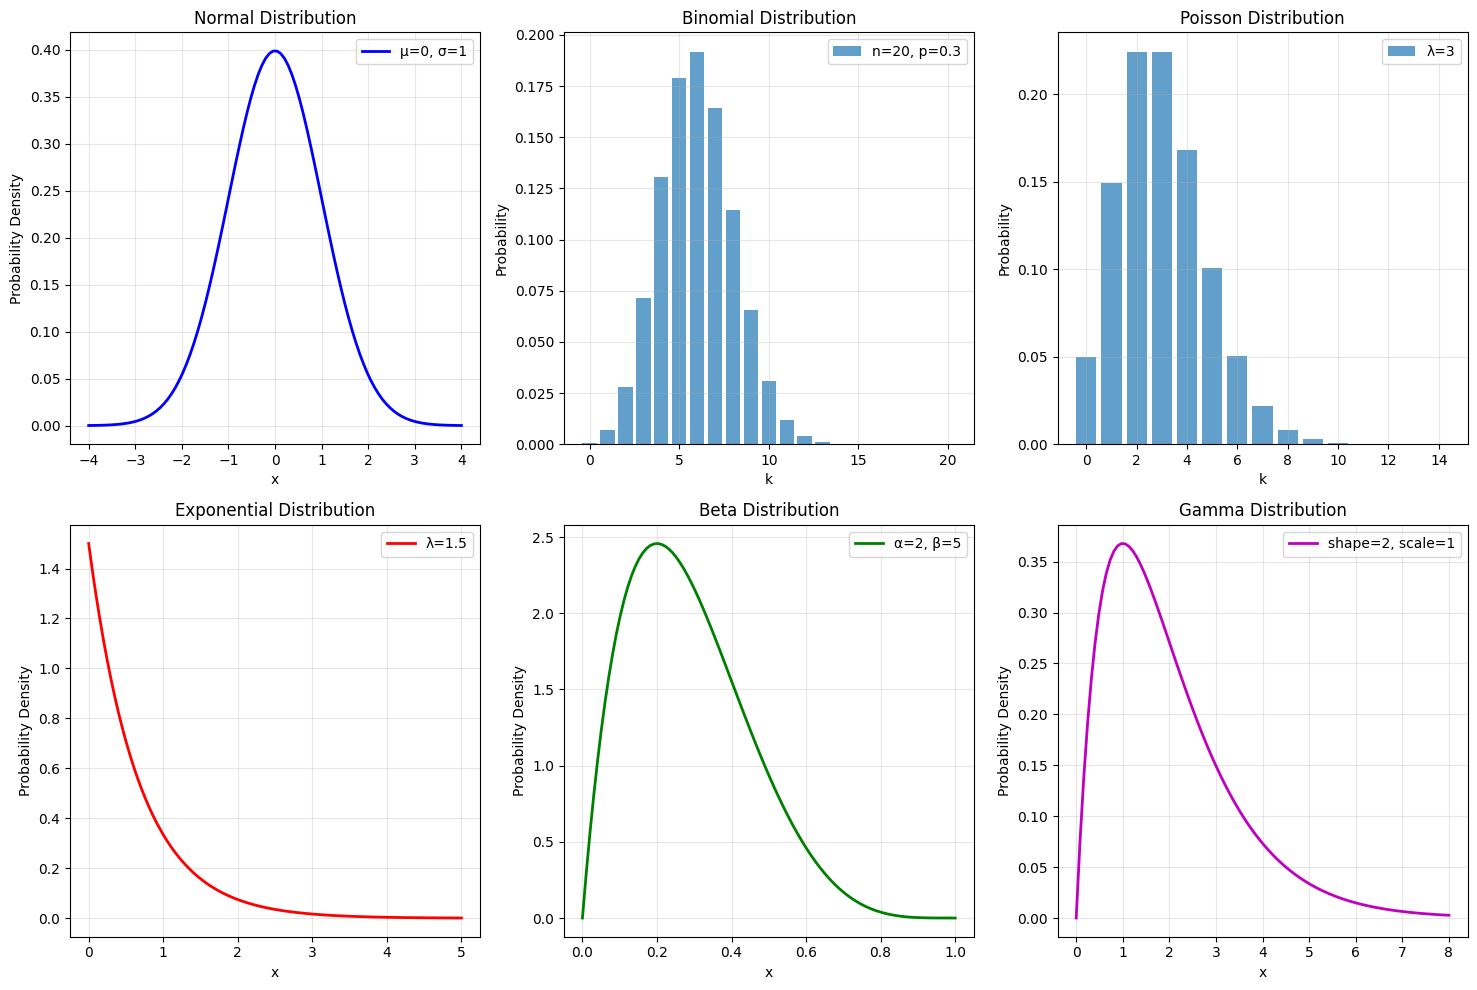

In [39]:
distributions = probability_distributions_demo()

In [40]:
# Bayes' theorem implementation and applications
def bayes_theorem_demo():
    """Demonstrate Bayes' theorem with practical examples"""

    # Medical diagnosis example
    # P(Disease|Test+) = P(Test+|Disease) * P(Disease) / P(Test+)

    # Prior probability of disease
    P_disease = 0.01  # 1% of population has the disease

    # Test characteristics
    sensitivity = 0.95  # P(Test+|Disease) = 95%
    specificity = 0.98  # P(Test-|No Disease) = 98%

    # Calculate marginal probability P(Test+)
    P_test_positive = sensitivity * P_disease + (1 - specificity) * (1 - P_disease)

    # Apply Bayes' theorem
    P_disease_given_positive = (sensitivity * P_disease) / P_test_positive

    print("Medical Diagnosis Example:")
    print(f"Prior probability of disease: {P_disease:.3f}")
    print(f"Test sensitivity: {sensitivity:.3f}")
    print(f"Test specificity: {specificity:.3f}")
    print(f"Probability of positive test: {P_test_positive:.3f}")
    print(f"Probability of disease given positive test: {P_disease_given_positive:.3f}")

    # Naive Bayes classifier example
    def naive_bayes_classifier():
        """Simple Naive Bayes classifier for text classification"""

        # Sample data: word frequencies in spam vs ham emails
        # Features: ['free', 'money', 'click', 'meeting', 'project']
        spam_data = np.array([
            [3, 2, 1, 0, 0],  # Email 1
            [2, 3, 2, 0, 1],  # Email 2
            [1, 1, 3, 0, 0],  # Email 3
            [4, 2, 1, 0, 0],  # Email 4
        ])

        ham_data = np.array([
            [0, 0, 0, 2, 3],  # Email 1
            [1, 0, 0, 3, 2],  # Email 2
            [0, 1, 0, 1, 4],  # Email 3
            [0, 0, 1, 2, 3],  # Email 4
        ])

        # Calculate class priors
        total_emails = len(spam_data) + len(ham_data)
        P_spam = len(spam_data) / total_emails
        P_ham = len(ham_data) / total_emails

        # Calculate likelihoods (using Laplace smoothing)
        alpha = 1  # Smoothing parameter
        vocab_size = spam_data.shape[1]

        # Spam likelihoods
        spam_word_counts = np.sum(spam_data, axis=0)
        spam_total_words = np.sum(spam_word_counts)
        spam_likelihoods = (spam_word_counts + alpha) / (spam_total_words + alpha * vocab_size)

        # Ham likelihoods
        ham_word_counts = np.sum(ham_data, axis=0)
        ham_total_words = np.sum(ham_word_counts)
        ham_likelihoods = (ham_word_counts + alpha) / (ham_total_words + alpha * vocab_size)

        # Classify new email: [1, 1, 0, 1, 2] (word frequencies)
        new_email = np.array([1, 1, 0, 1, 2])

        # Calculate posterior probabilities (in log space to avoid underflow)
        log_P_spam_given_email = np.log(P_spam) + np.sum(new_email * np.log(spam_likelihoods))
        log_P_ham_given_email = np.log(P_ham) + np.sum(new_email * np.log(ham_likelihoods))

        # Convert back to probabilities
        if log_P_spam_given_email > log_P_ham_given_email:
            prediction = "SPAM"
            confidence = 1 / (1 + np.exp(log_P_ham_given_email - log_P_spam_given_email))
        else:
            prediction = "HAM"
            confidence = 1 / (1 + np.exp(log_P_spam_given_email - log_P_ham_given_email))

        print(f"\nNaive Bayes Classifier:")
        print(f"New email word frequencies: {new_email}")
        print(f"Prediction: {prediction}")
        print(f"Confidence: {confidence:.3f}")

        return prediction, confidence

    naive_bayes_classifier()

    return P_disease_given_positive

bayes_result = bayes_theorem_demo()

Medical Diagnosis Example:
Prior probability of disease: 0.010
Test sensitivity: 0.950
Test specificity: 0.980
Probability of positive test: 0.029
Probability of disease given positive test: 0.324

Naive Bayes Classifier:
New email word frequencies: [1 1 0 1 2]
Prediction: HAM
Confidence: 0.962


Point Estimation:
True population mean: 50
Sample mean: 48.962
True population std: 10
Sample std: 9.082

95.0% Confidence Interval:
[47.160, 50.764]
True mean in CI: True

Hypothesis Test (H0: μ = 50):
t-statistic: -1.143
p-value: 0.256
Reject H0 at α = 0.05: False

Bootstrap 95.0% Confidence Interval:
[47.277, 50.629]


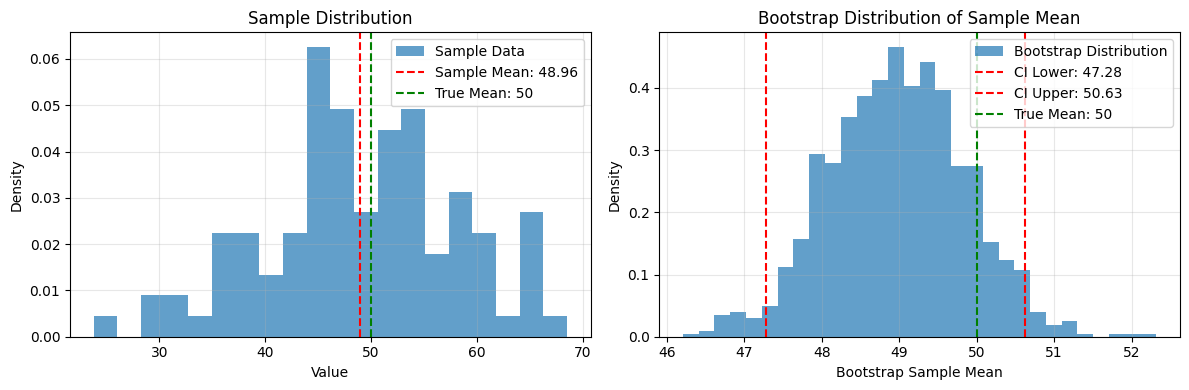

In [41]:
# Statistical inference examples
def statistical_inference_demo():
    """Demonstrate statistical inference concepts"""

    # Generate sample data
    np.random.seed(42)
    population_mean = 50
    population_std = 10
    sample_size = 100

    sample = np.random.normal(population_mean, population_std, sample_size)

    # Point estimation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation

    print("Point Estimation:")
    print(f"True population mean: {population_mean}")
    print(f"Sample mean: {sample_mean:.3f}")
    print(f"True population std: {population_std}")
    print(f"Sample std: {sample_std:.3f}")

    # Confidence interval for mean
    confidence_level = 0.95
    alpha = 1 - confidence_level

    # Using t-distribution for small samples
    t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)
    margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    print(f"\n{confidence_level*100}% Confidence Interval:")
    print(f"[{ci_lower:.3f}, {ci_upper:.3f}]")
    print(f"True mean in CI: {ci_lower <= population_mean <= ci_upper}")

    # Hypothesis testing
    # H0: μ = 50, H1: μ ≠ 50
    null_hypothesis_mean = 50

    # t-test statistic
    t_stat = (sample_mean - null_hypothesis_mean) / (sample_std / np.sqrt(sample_size))

    # p-value (two-tailed test)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=sample_size-1))

    print(f"\nHypothesis Test (H0: μ = {null_hypothesis_mean}):")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_value:.3f}")
    print(f"Reject H0 at α = 0.05: {p_value < 0.05}")

    # Bootstrap confidence interval
    def bootstrap_confidence_interval(data, statistic_func, n_bootstrap=1000, confidence_level=0.95):
        """Calculate bootstrap confidence interval"""
        n = len(data)
        bootstrap_stats = []

        for _ in range(n_bootstrap):
            # Resample with replacement
            bootstrap_sample = np.random.choice(data, size=n, replace=True)
            bootstrap_stats.append(statistic_func(bootstrap_sample))

        bootstrap_stats = np.array(bootstrap_stats)

        # Calculate percentiles
        alpha = 1 - confidence_level
        lower_percentile = (alpha/2) * 100
        upper_percentile = (1 - alpha/2) * 100

        ci_lower = np.percentile(bootstrap_stats, lower_percentile)
        ci_upper = np.percentile(bootstrap_stats, upper_percentile)

        return ci_lower, ci_upper, bootstrap_stats

    # Bootstrap CI for mean
    boot_ci_lower, boot_ci_upper, boot_stats = bootstrap_confidence_interval(
        sample, np.mean, n_bootstrap=1000
    )

    print(f"\nBootstrap {confidence_level*100}% Confidence Interval:")
    print(f"[{boot_ci_lower:.3f}, {boot_ci_upper:.3f}]")

    # Visualize bootstrap distribution
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(sample, bins=20, alpha=0.7, density=True, label='Sample Data')
    plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
    plt.axvline(population_mean, color='green', linestyle='--', label=f'True Mean: {population_mean}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Sample Distribution')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.hist(boot_stats, bins=30, alpha=0.7, density=True, label='Bootstrap Distribution')
    plt.axvline(boot_ci_lower, color='red', linestyle='--', label=f'CI Lower: {boot_ci_lower:.2f}')
    plt.axvline(boot_ci_upper, color='red', linestyle='--', label=f'CI Upper: {boot_ci_upper:.2f}')
    plt.axvline(population_mean, color='green', linestyle='--', label=f'True Mean: {population_mean}')
    plt.xlabel('Bootstrap Sample Mean')
    plt.ylabel('Density')
    plt.title('Bootstrap Distribution of Sample Mean')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return sample, boot_stats

sample_data, bootstrap_stats = statistical_inference_demo()